Student Name:  Sue Mir

Cohort: Data Science / 17/12/2020 - Module 5 - Capstone

# BOOKMARKS
### [PROCESS-CHECKLIST](#PROCESS-CHECKLIST)
- [OBTAIN](#OBTAIN) 
- [SCRUB](#SCRUB) 
- [EXPLORE](#EXPLORE) 
- [MODEL](#MODEL) 
- [iNTERPRET](#iNTERPRET) 

### [CONCLUSIONS & RECOMMENDATIONS](#CONCLUSIONS-&-RECOMMENDATIONS)
___

# Project Description and Approach

Description:
    
To perform regression analysis on the subset of Covid19 ma case numbers and Nasdaq Daily MA price date in order to find a positive linear relationship between the Nasdaq Daily MA prices and Covid19 MA Case predictor values explored and discovered in the regression analysis.

To present the findings to a non-technical audience within a given timeframe of 5 minutes that is clear and
informative, representative of the interest of this audience which is 
'What Covid19 case number factors from the findings in this analysis influence the increase or decrease in Nasdaq Daily MA Prices?'

Approach:
To obtain the data, view it and decide:
Which values need data cleaning that have unusual values and are not numeric data types and how to clean that data/convert the data types so that not only they are representative of the data but also are numerical in order to be processed easily by the regression algorithm.

To perform EDA on the data in order to find relationships in the data and normalization patterns that may require further cleaning in order to normalise.

To build a regression model in order to find the best fit predictor values with the lowest kurtosis, skew and R2 value, the highest linearity to the regression line, (the least variance).

To analyse the regression model results and further perform train testing on the model.

To be able to present answers to the a technical audience on which predictors had a positive influence on House Prices and why.


# OBTAIN


## Initialise and Load Libraries

In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy.stats as stats
from statsmodels.formula.api import ols
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
    
#------------Stop the deprecation warning from popping up
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Initialise functions

In [161]:
def make_datetime_index(df,col_to_make_index = 'Date', drop=False, verbose=True):
    '''           
         Transforms data into datetime object with time as index, defaulted as monthly     
         
         df          Dataframe to transform     
    '''

    df[col_to_make_index] = pd.to_datetime(df[col_to_make_index], errors='coerce')
    df = df.set_index('Date', drop=False)
    if verbose:
        display(df.index)
    return df

## Load Data and Explore Overview

In [162]:
ecdc_covid_usa_nasdaq = pd.read_csv('ecdc_covid_usa_nasdaq_close_price.csv')
ecdc_covid_usa_nasdaq.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,ndx_ma1,ndx_ma2,ndx_ma3,...,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,usa_cases_ma7,usa_cases_ma14,usa_cases_ma21,usa_cases_ma28
71,2020-06-23,10209.799805,10209.799805,10209.799805,10209.799805,10209.799805,0,10209.799805,10170.049805,10116.233073,...,United_States_of_America,US,USA,329064917.0,America,106.701438,38297.714286,43408.785714,48763.333333,53298.142857
72,2020-06-24,10002.700195,10002.700195,10002.700195,10002.700195,10002.700195,0,10002.700195,10106.250000,10114.266602,...,United_States_of_America,US,USA,329064917.0,America,111.580415,39750.000000,44737.357143,50035.904762,54203.857143
73,2020-06-25,10101.799805,10101.799805,10101.799805,10101.799805,10101.799805,0,10101.799805,10052.250000,10104.766602,...,United_States_of_America,US,USA,329064917.0,America,115.751324,41058.571429,46362.571429,51645.333333,55537.000000
74,2020-06-26,9849.360352,9849.360352,9849.360352,9849.360352,9849.360352,0,9849.360352,9975.580078,9984.620117,...,United_States_of_America,US,USA,329064917.0,America,121.241427,43588.428571,48117.357143,53234.761905,56769.464286
75,2020-06-29,9961.160156,9961.160156,9961.160156,9961.160156,9961.160156,0,9961.160156,9905.260254,9970.773438,...,United_States_of_America,US,USA,329064917.0,America,138.248405,47031.285714,52668.642857,57197.190476,59560.857143


In [163]:
#------------Display general overview of the data
#Data Initial Overview - Display info
display(ecdc_covid_usa_nasdaq.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 36 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Date                                                        76 non-null     object 
 1   Open                                                        76 non-null     float64
 2   High                                                        76 non-null     float64
 3   Low                                                         76 non-null     float64
 4   Close                                                       76 non-null     float64
 5   Adj Close                                                   76 non-null     float64
 6   Volume                                                      76 non-null     int64  
 7   ndx_ma1                                                     76 non-null     float64
 8   nd

None

In [164]:
#Data Initial Overview - Display a sample of 20 rows
display(ecdc_covid_usa_nasdaq.sample(20))

,Date,Open,High,Low,Close,Adj Close,Volume,ndx_ma1,ndx_ma2,ndx_ma3,...,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,usa_cases_ma7,usa_cases_ma14,usa_cases_ma21,usa_cases_ma28
15,2020-03-19,7288.520020,7288.520020,7288.520020,7288.520020,7288.520020,0,7288.520020,7231.850098,7312.550130,...,United_States_of_America,US,USA,329064917.0,America,2.812819,6972.000000,13085.071429,18684.857143,21538.892857
17,2020-03-23,7006.919922,7006.919922,7006.919922,7006.919922,7006.919922,0,7006.919922,7000.604980,7096.576660,...,United_States_of_America,US,USA,329064917.0,America,10.530445,13988.285714,20392.142857,23962.095238,25297.821429
72,2020-06-24,10002.700195,10002.700195,10002.700195,10002.700195,10002.700195,0,10002.700195,10106.250000,10114.266602,...,United_States_of_America,US,USA,329064917.0,America,111.580415,39750.000000,44737.357143,50035.904762,54203.857143
16,2020-03-20,6994.290039,6994.290039,6994.290039,6994.290039,6994.290039,0,6994.290039,7141.405029,7152.663411,...,United_States_of_America,US,USA,329064917.0,America,4.259646,8539.857143,14807.571429,20129.380952,22508.892857
36,2020-04-22,8664.629883,8664.629883,8664.629883,8664.629883,8664.629883,0,8664.629883,8533.814941,8598.046549,...,United_States_of_America,US,USA,329064917.0,America,129.528241,28671.285714,28063.000000,26674.476190,25744.500000
11,2020-03-13,7995.259766,7995.259766,7995.259766,7995.259766,7995.259766,0,7995.259766,7629.454834,7755.009928,...,United_States_of_America,US,USA,329064917.0,America,0.487138,1157.571429,4848.714286,10257.571429,15386.428571
62,2020-06-08,9901.519531,9901.519531,9901.519531,9901.519531,9901.519531,0,9901.519531,9862.954590,9785.189779,...,United_States_of_America,US,USA,329064917.0,America,259.214810,52874.285714,50809.214286,47997.190476,46591.607143
19,2020-03-25,7469.620117,7469.620117,7469.620117,7469.620117,7469.620117,0,7469.620117,7511.719971,7343.453288,...,United_States_of_America,US,USA,329064917.0,America,16.472738,16882.571429,22982.428571,25531.047619,26475.357143
53,2020-05-22,9413.990234,9413.990234,9413.990234,9413.990234,9413.990234,0,9413.990234,9395.990234,9425.666667,...,United_States_of_America,US,USA,329064917.0,America,97.340975,21154.285714,21404.785714,21362.428571,21837.035714
33,2020-04-17,8832.410156,8832.410156,8832.410156,8832.410156,8832.410156,0,8832.410156,8795.120117,8727.400065,...,United_States_of_America,US,USA,329064917.0,America,129.394225,28995.000000,28588.928571,28044.714286,26824.357143


In [165]:
#Data Initial Overview - Table dimensions
ecdc_covid_usa_nasdaq.shape

(76, 36)

In [166]:
#------------ Display general statistics of each column')
np.round(ecdc_covid_usa_nasdaq.describe())

,Open,High,Low,Close,Adj Close,Volume,ndx_ma1,ndx_ma2,ndx_ma3,ndx_ma4,...,month,year,usa_daily_cases,deaths,popData2019,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,usa_cases_ma7,usa_cases_ma14,usa_cases_ma21,usa_cases_ma28
count,76.0,76.0,76.0,76.0,76.0,76.0,76.0,76.0,76.0,76.0,...,76.0,76.0,76.0,76.0,76.0,76.0,76.0,76.0,76.0,76.0
mean,8826.0,8826.0,8826.0,8826.0,8826.0,0.0,8826.0,8810.0,8804.0,8801.0,...,5.0,2020.0,21569.0,928.0,329064917.0,87.0,23691.0,25365.0,26855.0,28299.0
std,880.0,880.0,880.0,880.0,880.0,0.0,880.0,875.0,870.0,864.0,...,2.0,0.0,14534.0,918.0,0.0,64.0,14784.0,15282.0,15808.0,16340.0
min,6994.0,6994.0,6994.0,6994.0,6994.0,0.0,6994.0,7001.0,7097.0,7116.0,...,2.0,2020.0,0.0,0.0,329064917.0,0.0,0.0,0.0,1.0,2.0
25%,8236.0,8236.0,8236.0,8236.0,8236.0,0.0,8236.0,8216.0,8243.0,8197.0,...,3.0,2020.0,10624.0,191.0,329064917.0,16.0,16513.0,21344.0,21484.0,21739.0
50%,8856.0,8856.0,8856.0,8856.0,8856.0,0.0,8856.0,8821.0,8820.0,8814.0,...,4.0,2020.0,22567.0,764.0,329064917.0,97.0,25767.0,25602.0,25206.0,25537.0
75%,9503.0,9503.0,9503.0,9503.0,9503.0,0.0,9503.0,9445.0,9437.0,9455.0,...,6.0,2020.0,28936.0,1462.0,329064917.0,124.0,30777.0,31470.0,36781.0,39865.0
max,10210.0,10210.0,10210.0,10210.0,10210.0,0.0,10210.0,10170.0,10116.0,10111.0,...,10.0,2020.0,54471.0,4928.0,329064917.0,269.0,55759.0,60957.0,62772.0,63911.0


In [167]:
#------------Check for columns with nulls
ecdc_covid_usa_nasdaq.isna().any()

Date                                                          False
Open                                                          False
High                                                          False
Low                                                           False
Close                                                         False
Adj Close                                                     False
Volume                                                        False
ndx_ma1                                                       False
ndx_ma2                                                       False
ndx_ma3                                                       False
ndx_ma4                                                       False
ndx_ma5                                                       False
ndx_ma6                                                       False
ndx_ma7                                                       False
ndx_ma8                                         

In [168]:
ecdc_covid_usa_nasdaq.isna().sum()

Date                                                          0
Open                                                          0
High                                                          0
Low                                                           0
Close                                                         0
Adj Close                                                     0
Volume                                                        0
ndx_ma1                                                       0
ndx_ma2                                                       0
ndx_ma3                                                       0
ndx_ma4                                                       0
ndx_ma5                                                       0
ndx_ma6                                                       0
ndx_ma7                                                       0
ndx_ma8                                                       0
ndx_ma9                                 

## Visualise Data

In [169]:
# ecdc_covid_usa_nasdaq_vis_scaled = ecdc_covid_usa_nasdaq
# type(ecdc_covid_usa_nasdaq_vis_scaled['Date'])
# #[Date] object data type converted into datetime
# ecdc_covid_usa_nasdaq_vis_scaled['Date'] = pd.to_datetime(ecdc_covid_usa_nasdaq_vis_scaled['Date'])
# ecdc_covid_usa_nasdaq_vis_scaled['Date']=ecdc_covid_usa_nasdaq_vis_scaled['Date'].map(pd.datetime.toordinal)
# #double check everything looks right
# ecdc_covid_usa_nasdaq_vis_scaled['Date'].head()
# # query the data type for date column
# type(ecdc_covid_usa_nasdaq_vis_scaled['Date'][0]) #pandas._libs.tslibs.timestamps.Timestamp


In [170]:
ecdc_covid_usa_nasdaq_vis_scld = ecdc_covid_usa_nasdaq[["Date","Close","ndx_ma7","ndx_ma14","ndx_ma21","ndx_ma28",
                                                        "usa_cases_ma7","usa_cases_ma14","usa_cases_ma21","usa_cases_ma28"]]

In [171]:
ecdc_covid_usa_nasdaq_vis_scld['Date'] = pd.to_datetime(ecdc_covid_usa_nasdaq_vis_scaled['Date'])
ecdc_covid_usa_nasdaq_vis_scld['Date']= ecdc_covid_usa_nasdaq_vis_scld['Date'].map(pd.datetime.toordinal)

/Users/SusannaVSyassen/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/SusannaVSyassen/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  
/Users/SusannaVSyassen/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

In [172]:
#ecdc_covid_usa_nasdaq_vis_scld = ecdc_covid_usa_nasdaq[["Close","ndx_ma7","ndx_ma14","ndx_ma21","ndx_ma28",
#                                                          "usa_cases_ma7","usa_cases_ma14","usa_cases_ma21","usa_cases_ma28"]]

In [173]:
ecdc_covid_usa_nasdaq_vis_scld.head()

,Date,Close,ndx_ma7,ndx_ma14,ndx_ma21,ndx_ma28,usa_cases_ma7,usa_cases_ma14,usa_cases_ma21,usa_cases_ma28
0,1,9079.629883,9531.708705,9531.708705,9354.355127,9354.355127,4.857143,28.428571,138.857143,954.000000
1,1,8834.870117,9423.018694,9423.018694,9468.789160,9468.789160,7.714286,37.071429,178.047619,1256.107143
2,1,8873.759766,9315.901507,9315.901507,9404.379102,9404.379102,7.142857,50.071429,219.428571,1656.750000
3,1,8436.669922,9145.454381,9145.454381,9286.726074,9286.726074,10.285714,69.428571,303.523810,1970.642857
4,1,8461.830078,8965.897182,8965.897182,9173.339062,9173.339062,14.285714,89.500000,445.523810,2469.107143


In [174]:
ecdc_covid_usa_nasdaq_vis_scld = make_datetime_index(ecdc_covid_usa_nasdaq_vis_scld)

/Users/SusannaVSyassen/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


DatetimeIndex(['1970-01-01 00:00:00.000000001',
               '1970-01-01 00:00:00.000000001',
               '1970-01-01 00:00:00.000000001',
               '1970-01-01 00:00:00.000000001',
               '1970-01-01 00:00:00.000000001',
               '1970-01-01 00:00:00.000000001',
               '1970-01-01 00:00:00.000000001',
               '1970-01-01 00:00:00.000000001',
               '1970-01-01 00:00:00.000000001',
               '1970-01-01 00:00:00.000000001',
               '1970-01-01 00:00:00.000000001',
               '1970-01-01 00:00:00.000000001',
               '1970-01-01 00:00:00.000000001',
               '1970-01-01 00:00:00.000000001',
               '1970-01-01 00:00:00.000000001',
               '1970-01-01 00:00:00.000000001',
               '1970-01-01 00:00:00.000000001',
               '1970-01-01 00:00:00.000000001',
               '1970-01-01 00:00:00.000000001',
               '1970-01-01 00:00:00.000000001',
               '1970-01-01 00:00:00.0000

In [175]:
display(ecdc_covid_usa_nasdaq_vis_scld.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 76 entries, 1970-01-01 00:00:00.000000001 to 1970-01-01 00:00:00.000000001
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            76 non-null     datetime64[ns]
 1   Close           76 non-null     float64       
 2   ndx_ma7         76 non-null     float64       
 3   ndx_ma14        76 non-null     float64       
 4   ndx_ma21        76 non-null     float64       
 5   ndx_ma28        76 non-null     float64       
 6   usa_cases_ma7   76 non-null     float64       
 7   usa_cases_ma14  76 non-null     float64       
 8   usa_cases_ma21  76 non-null     float64       
 9   usa_cases_ma28  76 non-null     float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 6.5 KB


None

In [176]:
ecdc_covid_usa_nasdaq_vis_scld.head()

,Date,Close,ndx_ma7,ndx_ma14,ndx_ma21,ndx_ma28,usa_cases_ma7,usa_cases_ma14,usa_cases_ma21,usa_cases_ma28
Date,,,,,,,,,,
1970-01-01 00:00:00.000000001,1970-01-01 00:00:00.000000001,9079.629883,9531.708705,9531.708705,9354.355127,9354.355127,4.857143,28.428571,138.857143,954.000000
1970-01-01 00:00:00.000000001,1970-01-01 00:00:00.000000001,8834.870117,9423.018694,9423.018694,9468.789160,9468.789160,7.714286,37.071429,178.047619,1256.107143
1970-01-01 00:00:00.000000001,1970-01-01 00:00:00.000000001,8873.759766,9315.901507,9315.901507,9404.379102,9404.379102,7.142857,50.071429,219.428571,1656.750000
1970-01-01 00:00:00.000000001,1970-01-01 00:00:00.000000001,8436.669922,9145.454381,9145.454381,9286.726074,9286.726074,10.285714,69.428571,303.523810,1970.642857
1970-01-01 00:00:00.000000001,1970-01-01 00:00:00.000000001,8461.830078,8965.897182,8965.897182,9173.339062,9173.339062,14.285714,89.500000,445.523810,2469.107143


In [177]:
#scaler = StandardScaler()
scaler = MinMaxScaler()
#do the minmax scaler here.....

In [178]:
ecdc_covid_usa_nasdaq_vis_scld = scaler.fit_transform(ecdc_covid_usa_nasdaq_vis_scld)

TypeError: invalid type promotion

KeyError: 'usa_daily_cases'

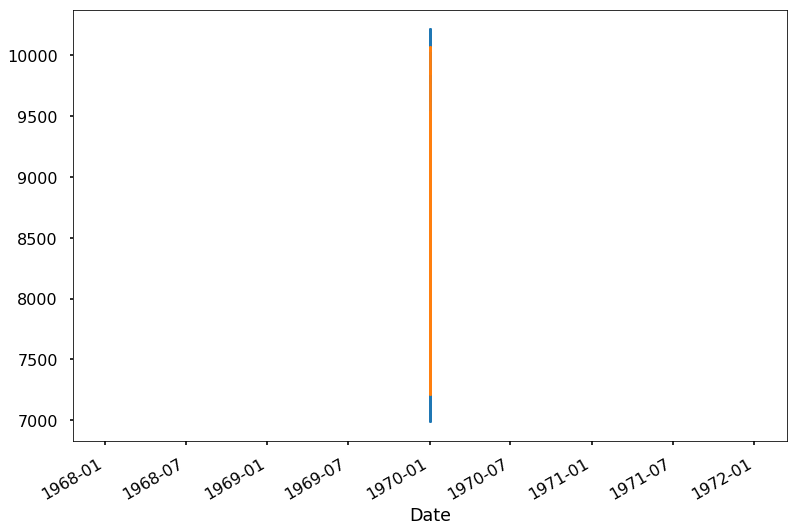

In [179]:
plt.style.use('seaborn-poster')
#ts = df_chicago_zipgroup['MeanValue'].loc[60657]
# def plot_ts(df2,col='MeanValue',movingaverages=['ma5','ma8','ma13','ma21','ma50']):
def plot_ts(df2,col='usa_cases_ma7',movingaverages=['Close','usa_cases_ma7','usa_cases_ma7','usa_cases_ma14','usa_cases_ma21','usa_cases_ma28']):    
    fig, ax = plt.subplots()
    
    for ma in movingaverages:
#             ts = df2[col].loc[ma]
#             ts.plot(ax=ax)
        ts = df2[ma]
#             ts.plot(label=str(ma), ax=ax)
        ts.plot(label=ma, ax=ax)
            
    #max_ = ts.loc['2004':'2010'].idxmax()
    max_ = ts.idxmax()
    crash = '03-2020'
    min_ = ts.loc[crash:].idxmin()
    ax.axvline(max_,label=f'Max Cases after Covid19 Stock Mkt Crash {max_}',color='green', ls=':')
    ax.axvline(crash,label=f'NASDAQ100 Covid 19 Mkt Crash {crash}',color='red', ls=':')
    ax.axvline(min_,label=f'Min Cases during Covid19 Mkt Crash {min_}',color='black')
    ax.legend()
    return fig,ax
            
ma_intervals = ['Close', 'ndx_ma7','usa_daily_cases','usa_cases_ma7','usa_cases_ma7','usa_cases_ma14','usa_cases_ma21','usa_cases_ma28']
fig,ax = plot_ts(ecdc_covid_usa_nasdaq_vis_scld, movingaverages=ma_intervals)

# SCRUB

## Scrub Iteration 1


### Decide on what to do with Nulls and Unusual Datatypes


In [180]:
#Keep only columns that we are interested in using - they are the nasdaq close and ma prices that are on the 
#same period as the covid ma cases 7,14,21,18 days.

#Data is numerical except for Date which is object type - convert Date column to datetime

In [181]:
col_list = ['Date','Close','ndx_ma7', 'ndx_ma14', 'ndx_ma21', 'ndx_ma28','usa_daily_cases','usa_cases_ma7','usa_cases_ma14','usa_cases_ma21','usa_cases_ma28' ]

ecdc_covid_usa_nasdaq = ecdc_covid_usa_nasdaq[col_list]

In [182]:
ecdc_covid_usa_nasdaq.head()

,Date,Close,ndx_ma7,ndx_ma14,ndx_ma21,ndx_ma28,usa_daily_cases,usa_cases_ma7,usa_cases_ma14,usa_cases_ma21,usa_cases_ma28
0,2020-02-24,9079.629883,9531.708705,9531.708705,9354.355127,9354.355127,0.0,4.857143,28.428571,138.857143,954.000000
1,2020-02-25,8834.870117,9423.018694,9423.018694,9468.789160,9468.789160,18.0,7.714286,37.071429,178.047619,1256.107143
2,2020-02-26,8873.759766,9315.901507,9315.901507,9404.379102,9404.379102,0.0,7.142857,50.071429,219.428571,1656.750000
3,2020-02-27,8436.669922,9145.454381,9145.454381,9286.726074,9286.726074,6.0,10.285714,69.428571,303.523810,1970.642857
4,2020-02-28,8461.830078,8965.897182,8965.897182,9173.339062,9173.339062,1.0,14.285714,89.500000,445.523810,2469.107143



### Check potential categoricals 


In [183]:
# There exists no unique values for consideration of binning as data is numerical count

In [184]:
# Decide on what to do with unusual datatypes like object data types - convert Date column to datetime

In [185]:
# type(ecdc_covid_usa_nasdaq['Date'])
# #[Date] object data type converted into datetime
# ecdc_covid_usa_nasdaq['Date'] = pd.to_datetime(ecdc_covid_usa_nasdaq['Date'])
# #double check everything looks right
# ecdc_covid_usa_nasdaq['Date'].head()
# # query the data type for date column
# type(ecdc_covid_usa_nasdaq['Date'][0]) #pandas._libs.tslibs.timestamps.Timestamp

# #Question of Interest:  What dates does this data cover?
# # df['date'].min()    
# # df['date'].max()    

In [186]:
ecdc_covid_usa_nasdaq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             76 non-null     object 
 1   Close            76 non-null     float64
 2   ndx_ma7          76 non-null     float64
 3   ndx_ma14         76 non-null     float64
 4   ndx_ma21         76 non-null     float64
 5   ndx_ma28         76 non-null     float64
 6   usa_daily_cases  76 non-null     float64
 7   usa_cases_ma7    76 non-null     float64
 8   usa_cases_ma14   76 non-null     float64
 9   usa_cases_ma21   76 non-null     float64
 10  usa_cases_ma28   76 non-null     float64
dtypes: float64(10), object(1)
memory usage: 6.7+ KB


## Scrub - Iteration 2
## To be run after EDA

#### Drop columns from multicollinearity results

In [187]:
# #drop features that correlate greater than 0.75 one at a time, starting from the greatest. 
# #Check multicollinearity again, then drop the next highest until none are greater than 0.75 to one another.
# df = df.drop(["columnname"], axis=1)

# df.head()

In [188]:
# df.describe()

#### Remove Outliers outside Box Plot Min/Max

In [189]:
# As this data is price and count sensitive, I will not be removing outliers

#### Log Transform / Standardise Numerical Columns

In [190]:
# As this data is price and count sensitive, I will not be standardising numerical columns

___
# Scrub Observations


# As this data is price and count sensitive the following was not done:
#### Dropped Columns


#### Kept columns


#### Scrub column data further


#### Remove outliers


    



# EXPLORE

/Users/SusannaVSyassen/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


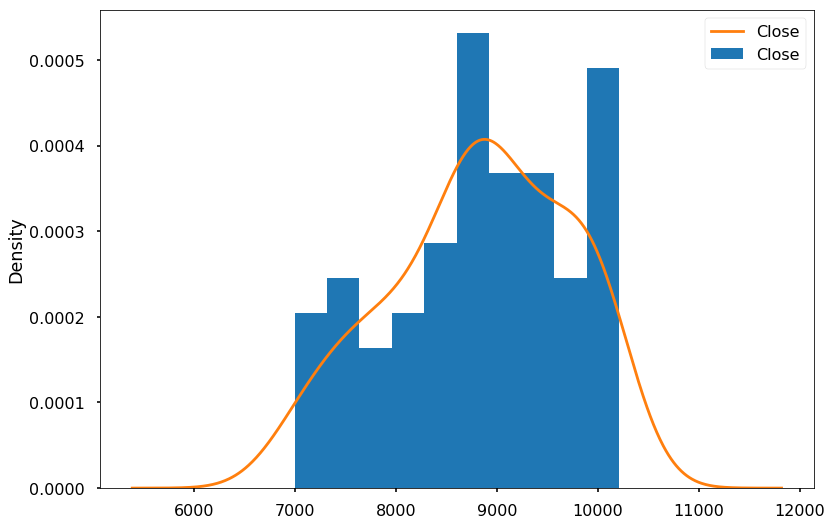

/Users/SusannaVSyassen/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


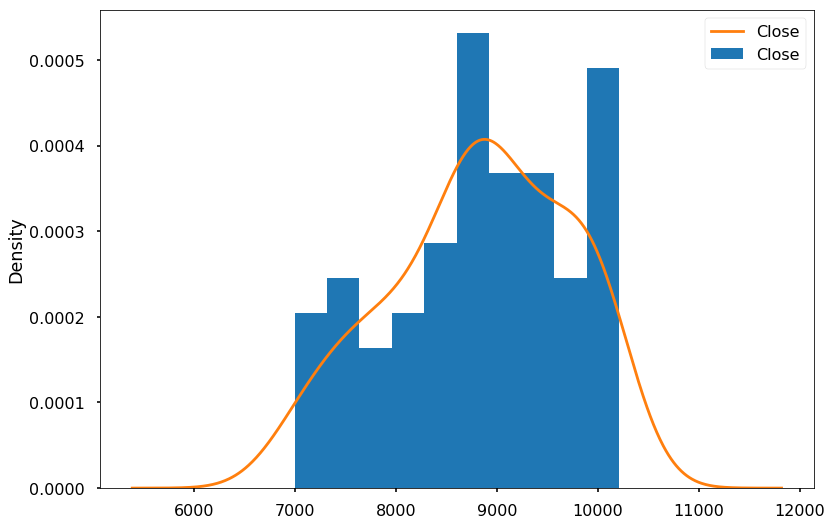

/Users/SusannaVSyassen/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


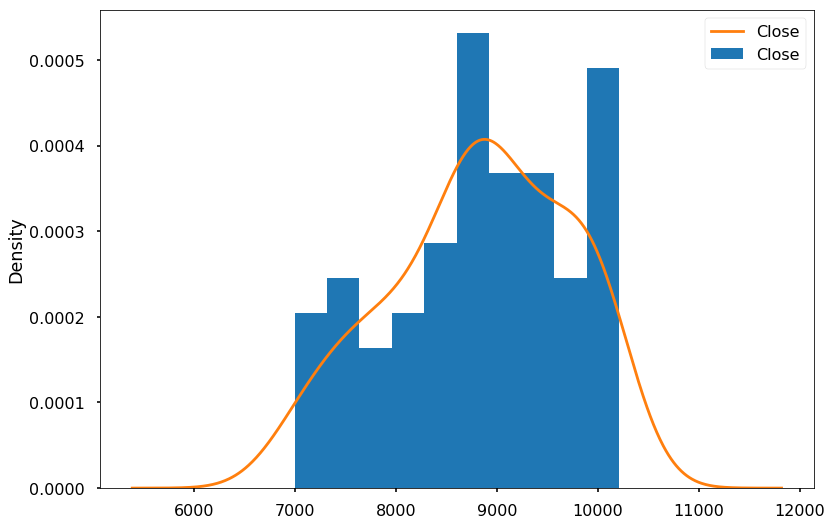

/Users/SusannaVSyassen/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


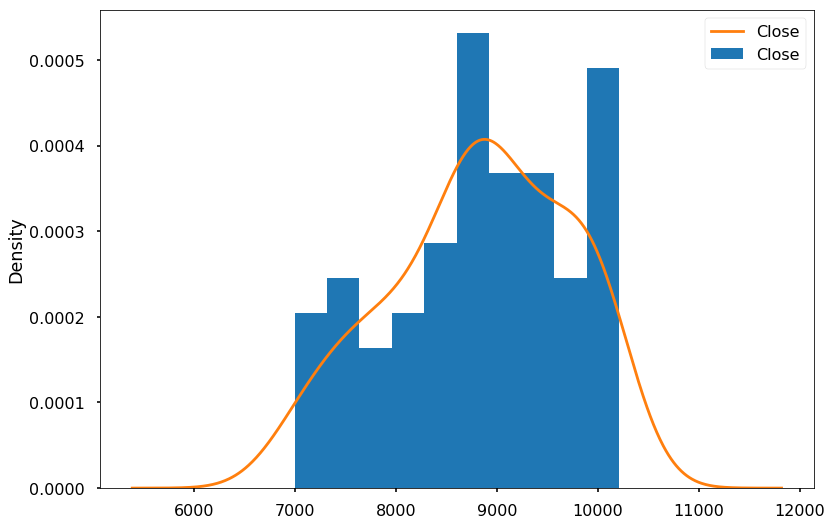

/Users/SusannaVSyassen/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


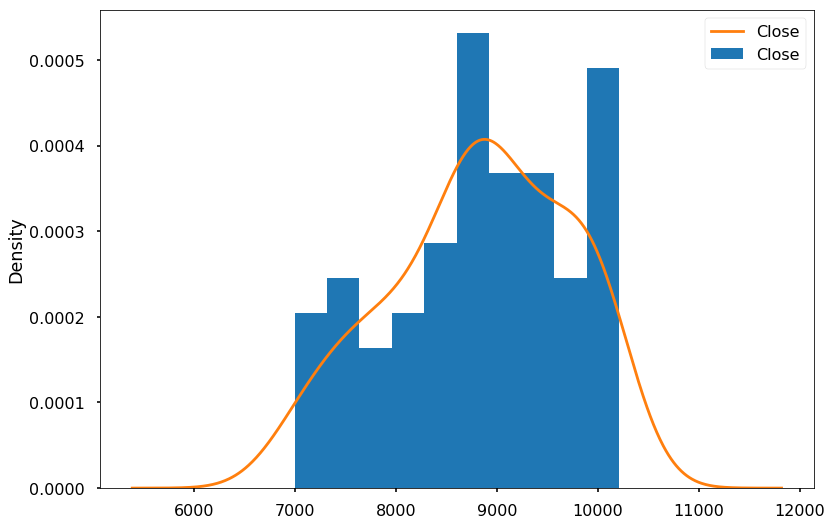

/Users/SusannaVSyassen/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


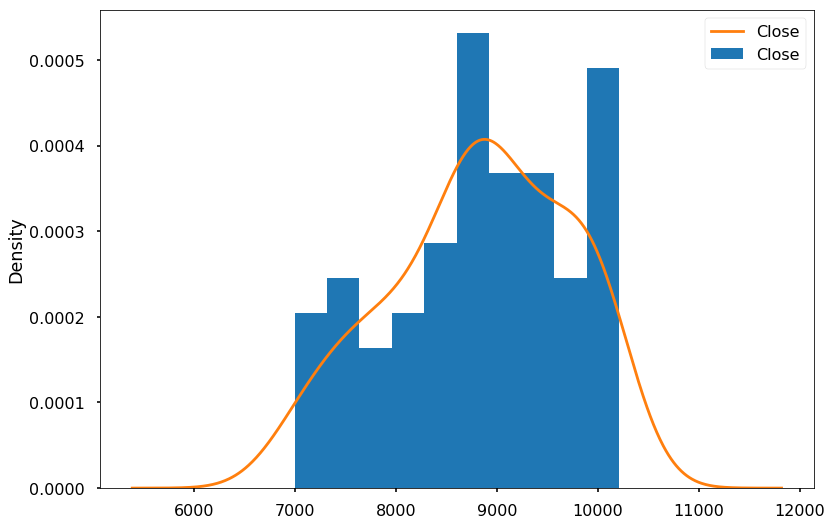

/Users/SusannaVSyassen/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


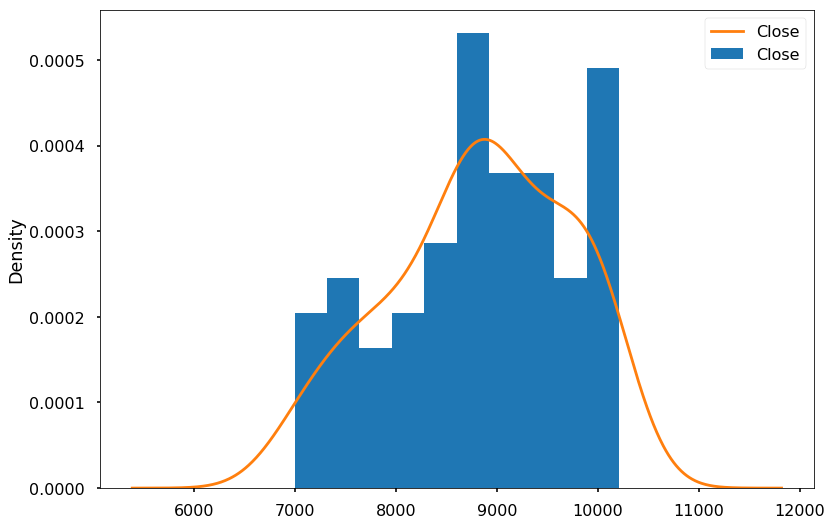

/Users/SusannaVSyassen/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


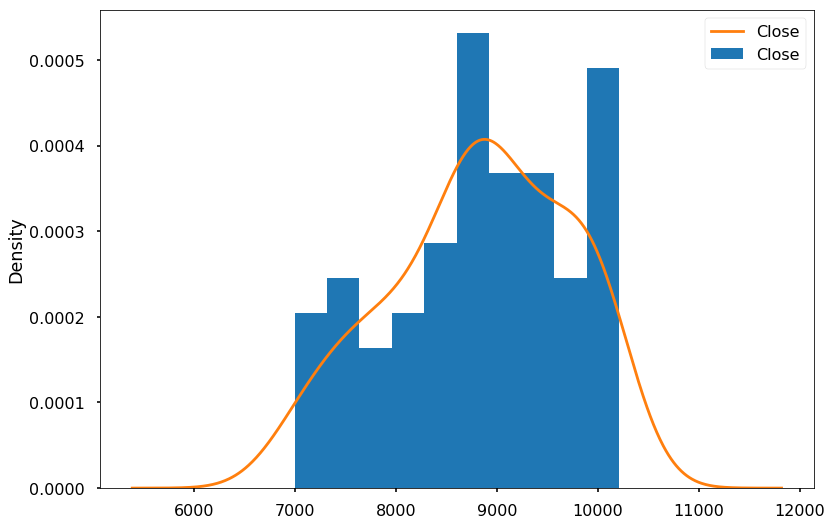

/Users/SusannaVSyassen/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


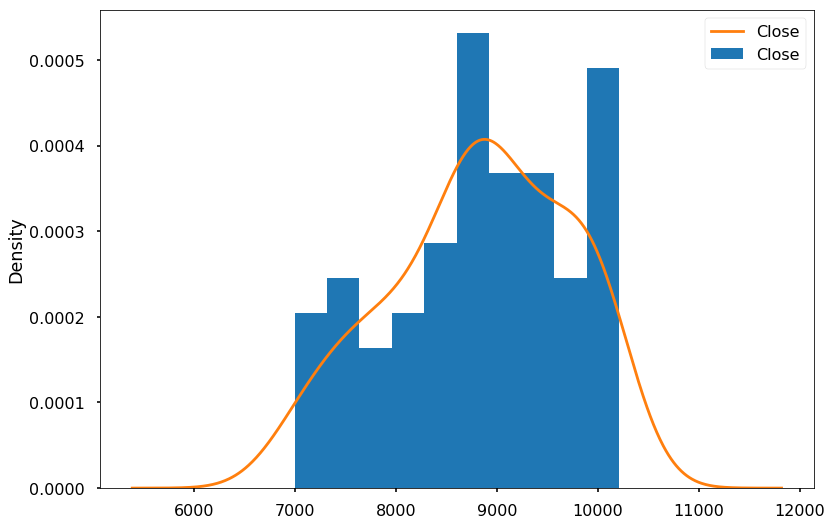

/Users/SusannaVSyassen/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


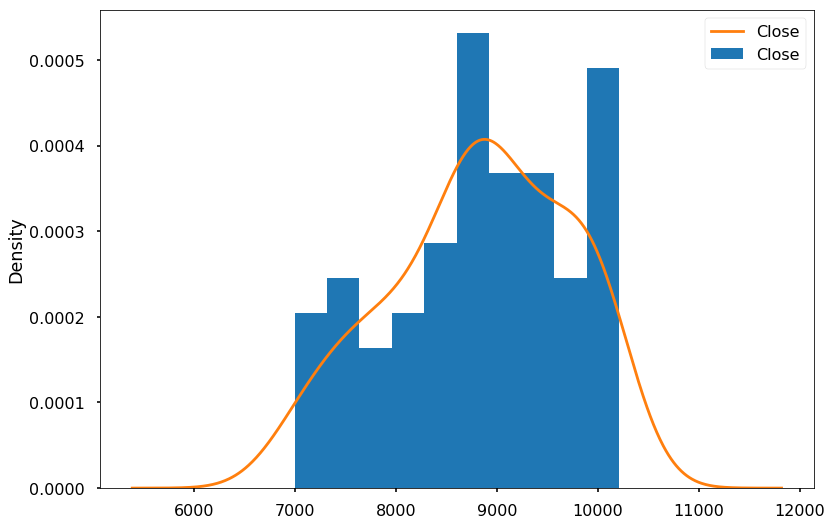

/Users/SusannaVSyassen/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


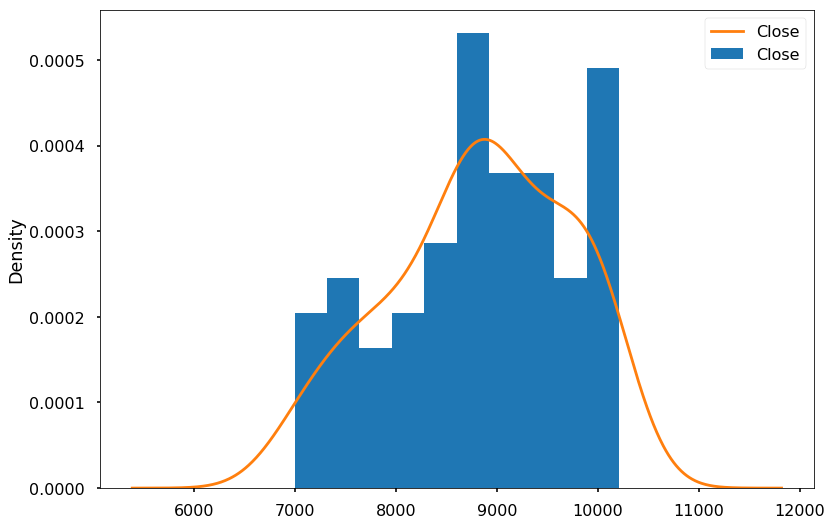

In [191]:
def explore_normality_hist_kde(column):
    """ Display hist and kde graphs for column in datafile df
    Arguments:
        column - string - data column to create box plot
    Returns: 
    """
    #----------------------------------------------------------------------------------
    #------------Check normality through hist and kde plots of the predictor column
    #----------------------------------------------------------------------------------
    ecdc_covid_usa_nasdaq[column].plot.hist(normed=True, label=column)
    ecdc_covid_usa_nasdaq[column].plot.kde(label=column)
    plt.legend()
    plt.show()
    
for column in ecdc_covid_usa_nasdaq:
    explore_normality_hist_kde('Close')


___
## Observations

#### Histogram and KDE Plots

##### Question:  Which variables are easiest to further normalise?
Columns with Long Tails on both side and have less skew to one side, potentially have closer to a bell curve - attempt to remove outliers and normalise
bedrooms
bathrooms
sqft_living
grade
sqft_above
long
lat
sqft_living_15

##### Question:  Which variables are difficult to further normalise?
Columns with Long Tails skewed on one side, left or right (positive or negative) are difficult to continue to normalise - potentially drop column
sqft_lot15, sqft_basement  They are skewed towards one side of the graph.

##### Question:  Which variables are potentially categories?
floors, waterfront (very long tails), condition (very long tails)

##### Question:  Which variables can be hot encoded to normalise in groups?
Potential categorical columnss, look at their description (mean, max, min) and normalize accordingly around these
description values
Columns that are binned
zip, yr_built

___

In [192]:
def explore_relationship_target_predictor(column, target):
    """ Display scatterplot with relationship between column and target 
    Arguments:
        column - string - data column to create box plot
    Returns: 
    """
    #----------------------------------------------------------------------------------
    #------------Check relationship of predictor to target column
    #----------------------------------------------------------------------------------
    #With scatter plot
    fig = plt.figure(figsize=(7, 5))
    fig.suptitle(target + ' vs. ' + column, fontsize=16)
    plt.scatter(ecdc_covid_usa_nasdaq[column], ecdc_covid_usa_nasdaq[target], label=column)
    plt.legend()
    plt.xlabel(column, fontsize=14)
    plt.ylabel(target, fontsize=14)
    plt.show()


In [193]:
# Step through each Nasdaq ma and look at the relationship with the covid ma

In [194]:
ecdc_covid_ma_cols = ['usa_daily_cases', 'usa_cases_ma7',  'usa_cases_ma14',  'usa_cases_ma21',  'usa_cases_ma28', ]

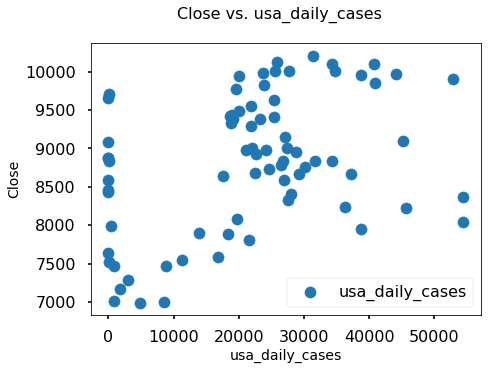

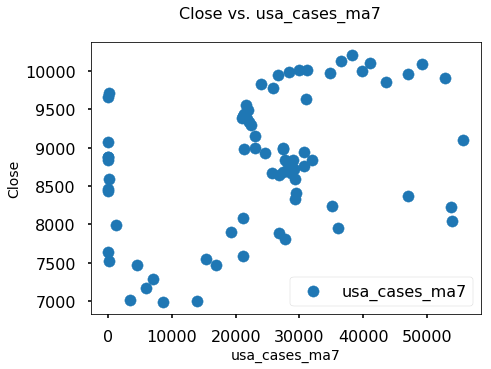

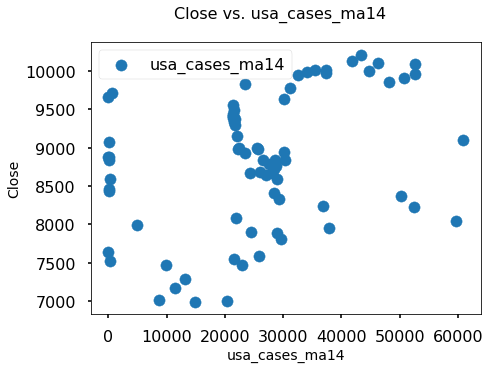

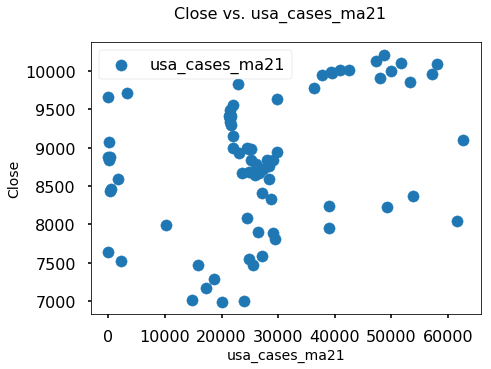

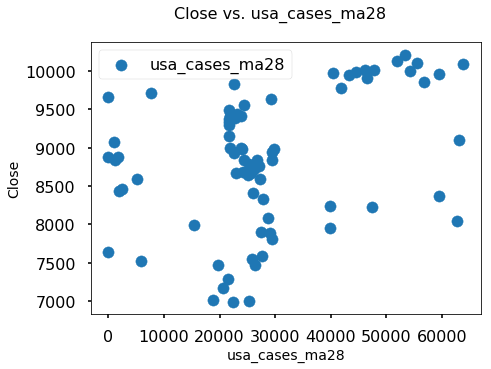

In [195]:
for column in ecdc_covid_ma_cols:
    explore_relationship_target_predictor(column, 'Close')

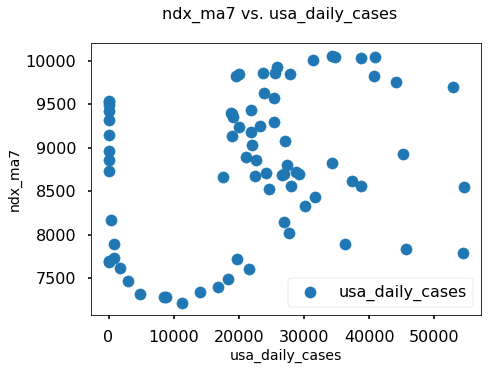

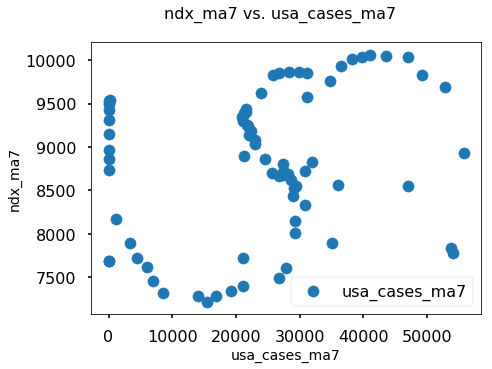

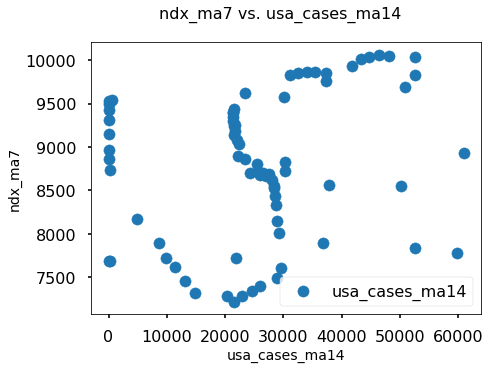

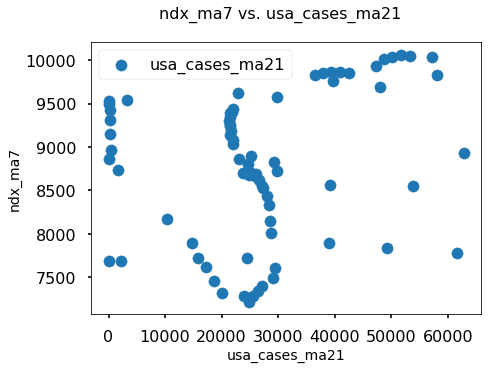

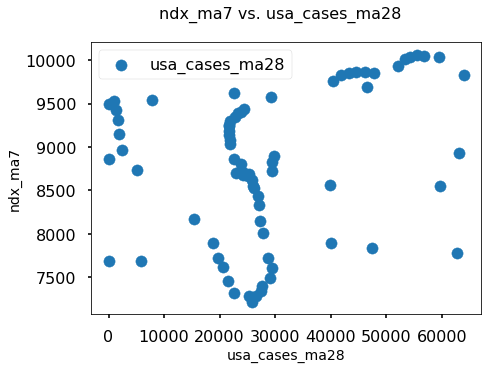

In [196]:
for column in ecdc_covid_ma_cols:
    explore_relationship_target_predictor(column, 'ndx_ma7')

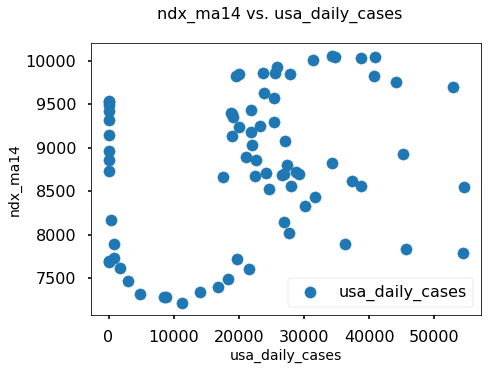

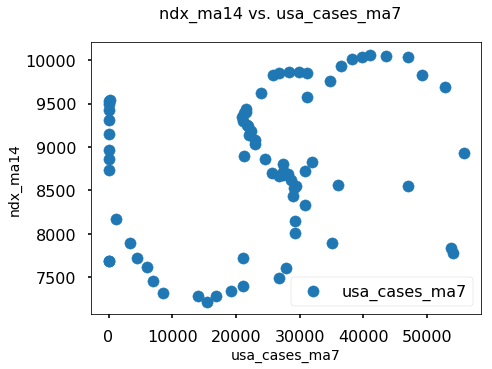

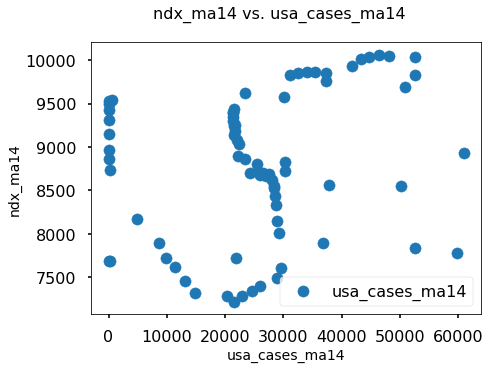

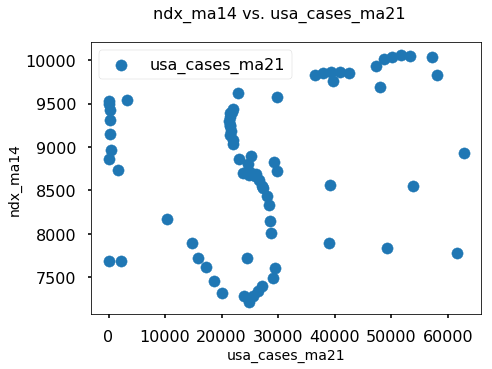

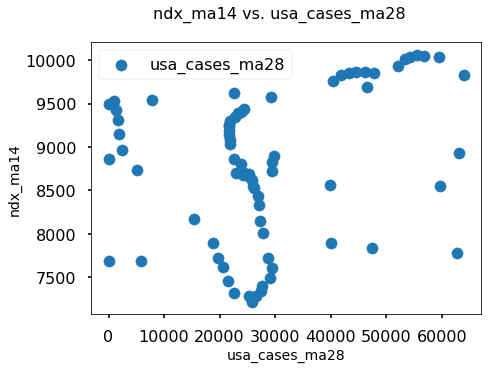

In [197]:
for column in ecdc_covid_ma_cols:
    explore_relationship_target_predictor(column, 'ndx_ma14')

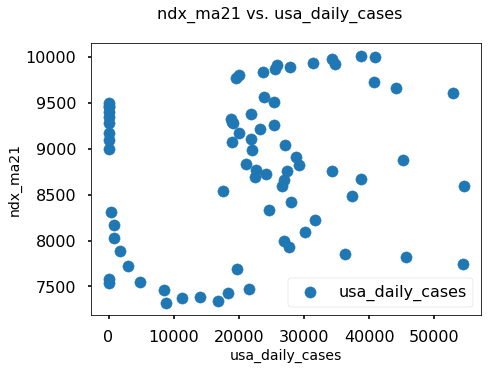

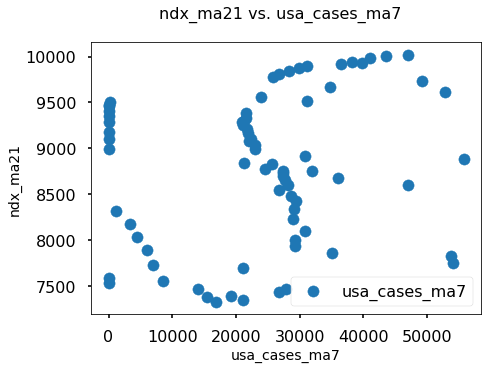

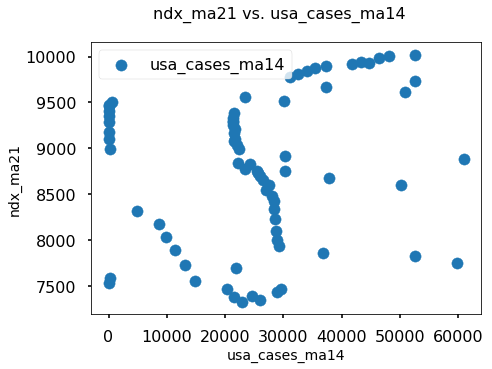

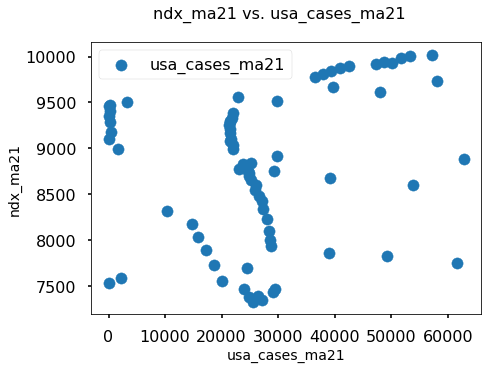

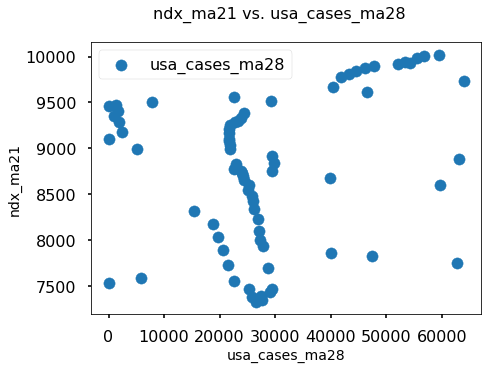

In [198]:
for column in ecdc_covid_ma_cols:
    explore_relationship_target_predictor(column, 'ndx_ma21')

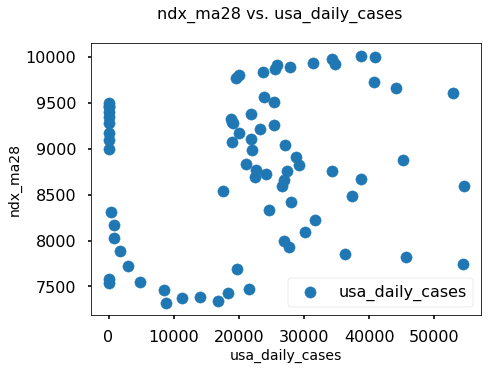

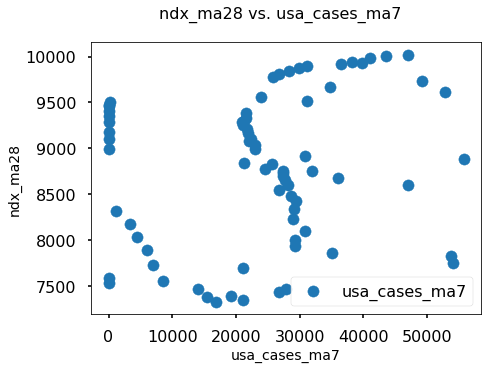

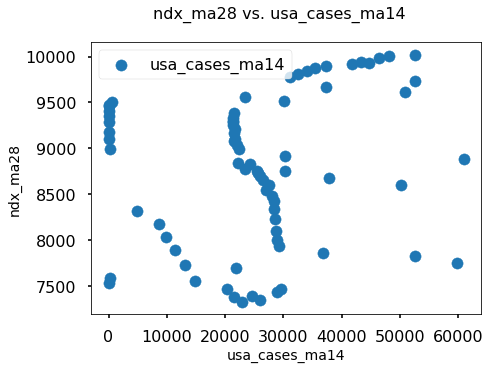

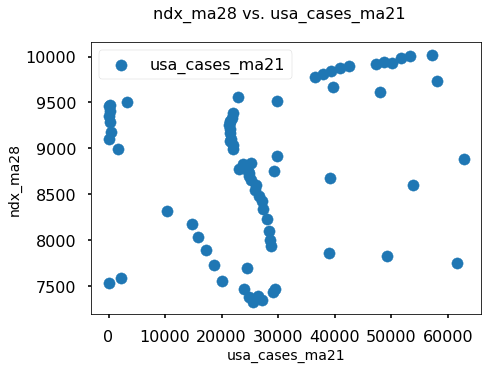

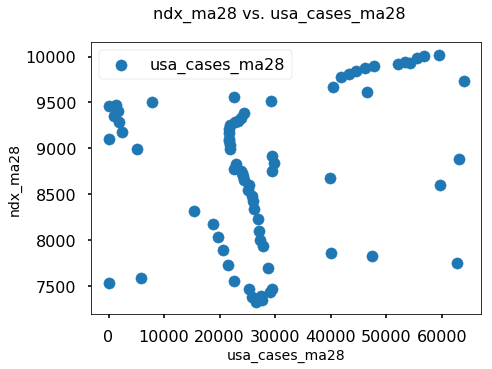

In [199]:
for column in ecdc_covid_ma_cols:
    explore_relationship_target_predictor(column, 'ndx_ma28')

___
## Observations

#### Scatter Plots on Relationship between Target and Predictors

##### Question: Which variables are potential categories?
columns which have vertical relationship with target - there exists none

##### Question:  Which variables have little or no relationship with target?
Columns that do not show a positive direction of growth in y value (target)
columns which have a little or no relationship (est 4/10) with target - drop these columns?  Most of them did not show a clear relationship with target NASDAQ price

##### Question:  Which variables have some relationship with target?
Columns that show a positive direction of growth in y value (target)
columns which have a slight relationship (est 4/10) with target: Most of them did not show a clear relationship with target NASDAQ price



/Users/SusannaVSyassen/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


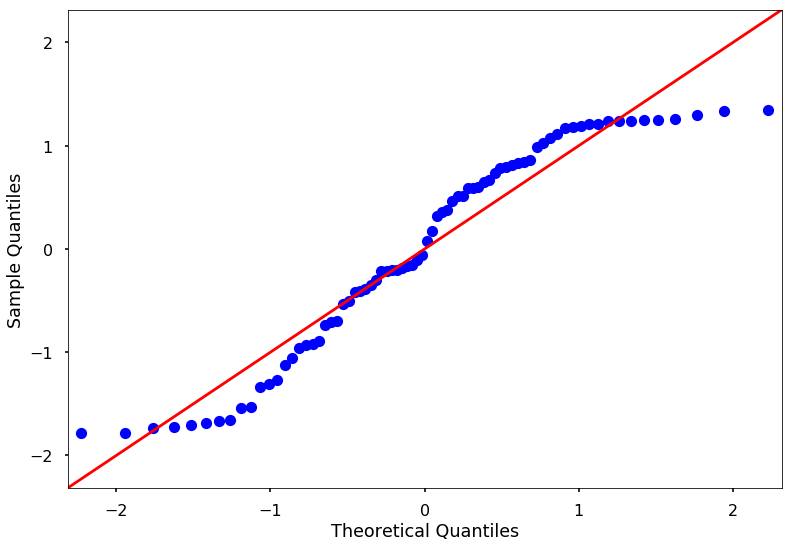

In [200]:
def explore_normality_qqplots(column, target):
    """ Display qq plot for column in datafile
    Arguments:
        column - string - data column to create box plot
    Returns: 
    """
    #----------------------------------------------------------------------------------
    #------------Check the normality assumptions by creating a QQ-plot
    #---------------------------------------------------------------------------------- 
    import scipy.stats as stats
    f = target + '~' + column
    model = smf.ols(formula=f, data=ecdc_covid_usa_nasdaq).fit()
    residuals = model.resid
    fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
    fig.show()

# for column in df:
#     explore_normality_qqplots(column)   

# Explore further columns of interest after above normalisation results
explore_normality_qqplots('usa_cases_ma7', 'ndx_ma7')

/Users/SusannaVSyassen/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


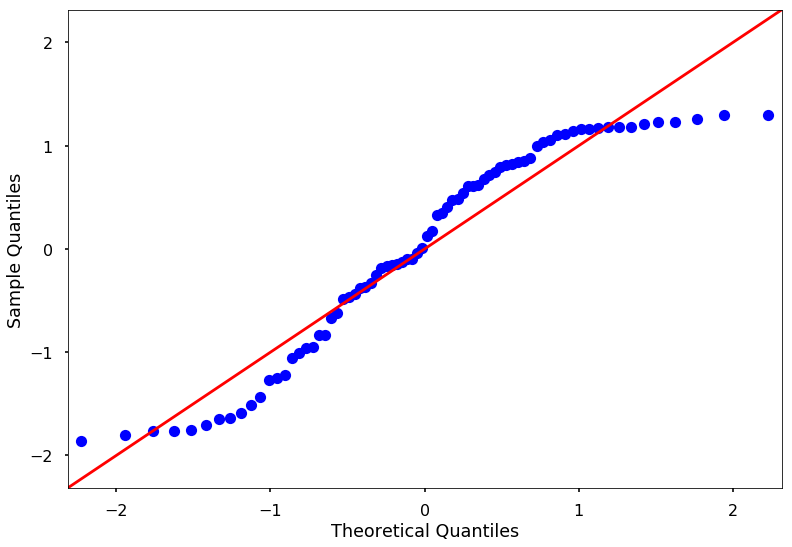

In [201]:
# Explore further columns of interest after above normalisation results
explore_normality_qqplots('usa_cases_ma14', 'ndx_ma14')

/Users/SusannaVSyassen/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


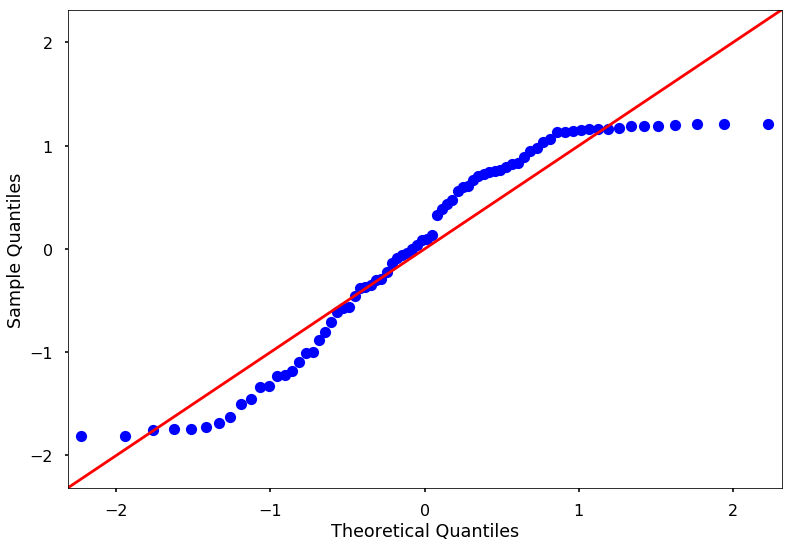

In [202]:
# Explore further columns of interest after above normalisation results
explore_normality_qqplots('usa_cases_ma21', 'ndx_ma21')

/Users/SusannaVSyassen/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


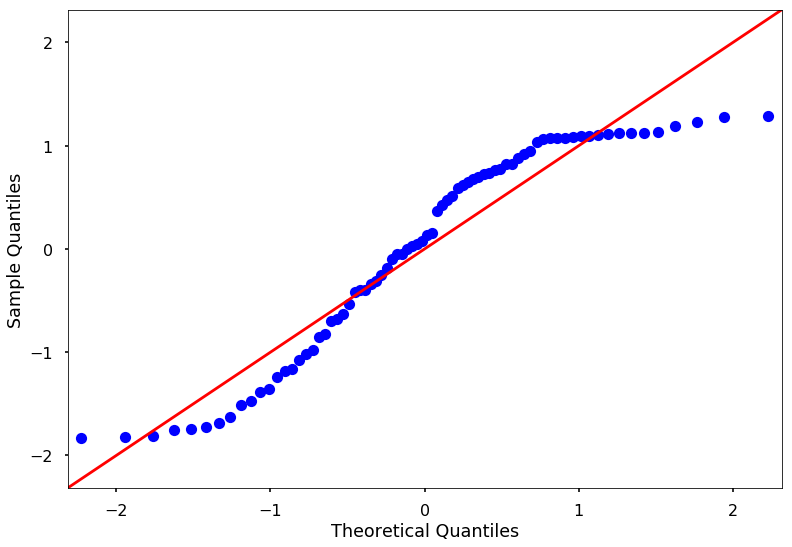

In [203]:
explore_normality_qqplots('usa_cases_ma28', 'ndx_ma28')

___
## Observations

#### Normality Assumptions with QQ Plots

##### Question:  Which variables show a positive relationship with target?
Those variables in the qq plot which show a closer relationship to the regression line.  As they skew away from the regression line, the variance and standard deviation becomes larger and the relationship becomes less.

The following was not done as data is sensitive:
After removing outliers outside the min and max of the boxplots of these values, standardising them through log and min/max standardistion the relationships still show variance on both tails of the qq plots. There is room to further normalise the predictor variables.

___

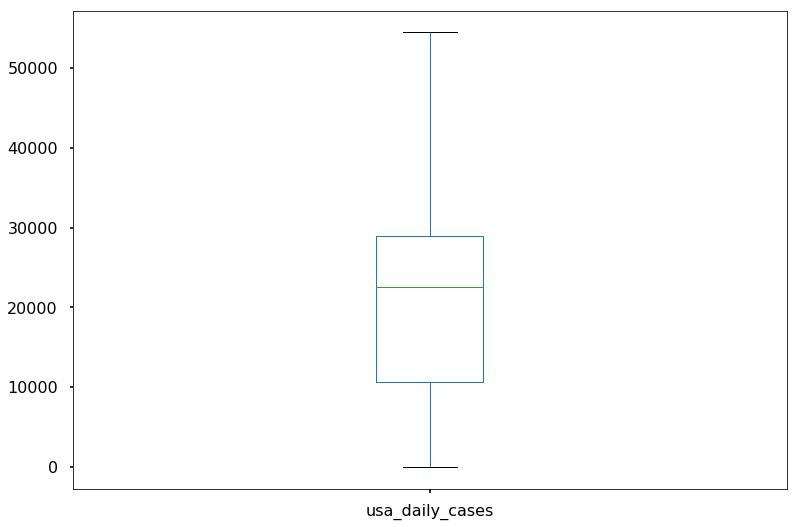

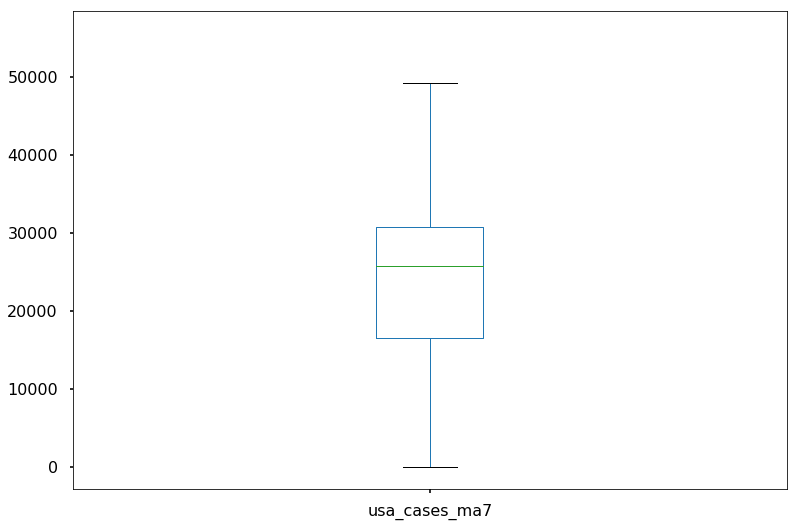

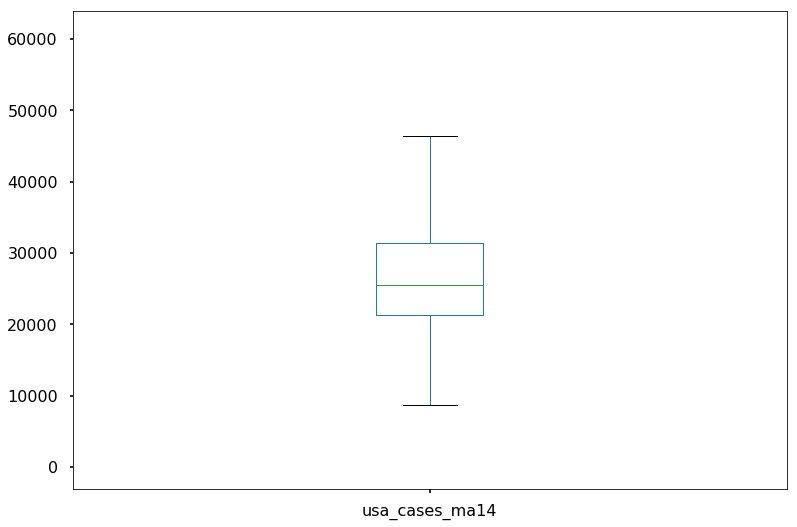

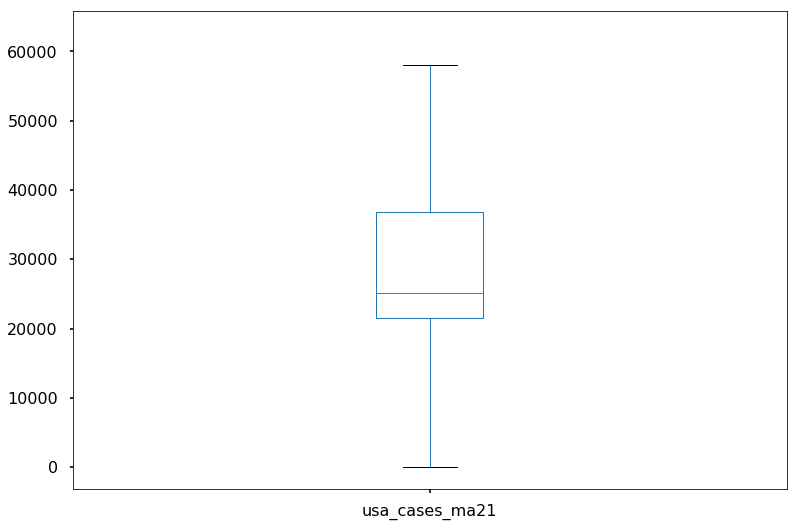

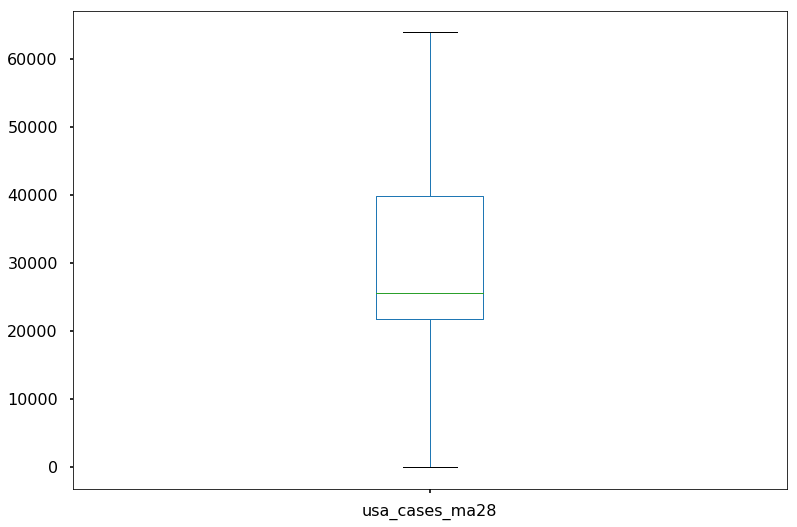

In [204]:
def explore_outliers_boxplot(column):
    """ Display boxplot for column in datafile df
    Arguments:
        column - string - data column to create box plot
    Returns: 
    """
    #----------------------------------------------------------------------------------
    #------------Look for outliers on predictor column
    #
    #---------------------------------------------------------------------------------- 
    plt.figure()
    ecdc_covid_usa_nasdaq[column].plot.box()
    
#for column in df:
explore_outliers_boxplot('usa_daily_cases')
explore_outliers_boxplot('usa_cases_ma7')
explore_outliers_boxplot('usa_cases_ma14')
explore_outliers_boxplot('usa_cases_ma21')
explore_outliers_boxplot('usa_cases_ma28')

___
## Observations

### Box Plots and Outliers

#### Question:  Which variables show outliers in the box plot?
Those variables that display values on the box plot outside of the min/max and interquartile range.

Remove outliers to cut tails on data and normalise
Price has a number of outliers at the positive right tail but keeping and will acknowledge this in the non-technical presentation.  Consider presenting model against price with outliers and model of price without outilers, depending on audience requirements on price.

___

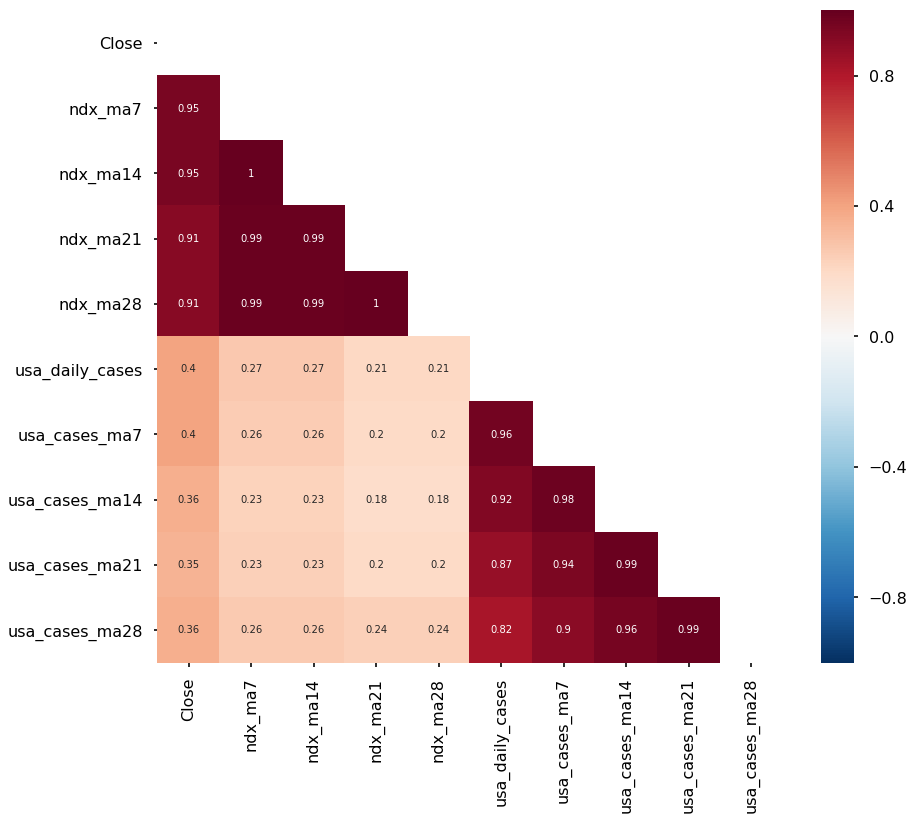

In [205]:
def explore_multicolinearity():
    """ Display multicolinearity graph for df
    Arguments:
        
    Returns: 
    """
    #----------------------------------------------------------------------------------
    #------------Check for multi-colinearity 
    #
    #---------------------------------------------------------------------------------- 
    import seaborn as sns
    correlation = ecdc_covid_usa_nasdaq.corr()
    plt.figure(figsize=(14, 12))
    mask = np.zeros_like(correlation, dtype=np.bool)
    idx = np.triu_indices_from(mask)
    mask[idx] = True
    heatmap = sns.heatmap(correlation, mask=mask, annot=True,vmin=-1, linewidths=0, cmap="RdBu_r")
    abs(ecdc_covid_usa_nasdaq.corr())>0.75
    
    
explore_multicolinearity()

___
## Observations

### Multicollinearity

#### Question:  Which variables have a higher correlation with target and each other?
None of the covid19 case number variables have a high correlation with the target NASDAQ ma prices.

___


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     9.328
Date:                Mon, 21 Dec 2020   Prob (F-statistic):           7.66e-07
Time:                        17:44:54   Log-Likelihood:                -603.25
No. Observations:                  76   AIC:                             1218.
Df Residuals:                      70   BIC:                             1232.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        8063.2305    167.603     48.109      0.000    7728.957    8397.504
usa_daily_cases    -0.0207      0.023     -0.887      0.378      -0.067       0.026
usa_cases_ma7       0.2756      0.086      3.210      0.002       0.104       0.447
usa_cases_ma14     -0.2746      0.189     -1.451      0.151      -0.652       0.103
usa_cases_ma21     -0.1709      0.203     -0.844      0.402      -0.575       0.233
usa_cases_ma28      0.2203      0.089      2.474      0.016       0.043       0.398
==============================================================================
Omnibus:                        0.819   Durbin-Watson:                   0.599
Prob(Omnibus):                  0.664   Jarque-Bera (JB):                0.917
Skew:                          -0.221   Prob(JB):                        0.632
Kurtosis:                       2.694   Cond. No.                     1.36e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.36e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

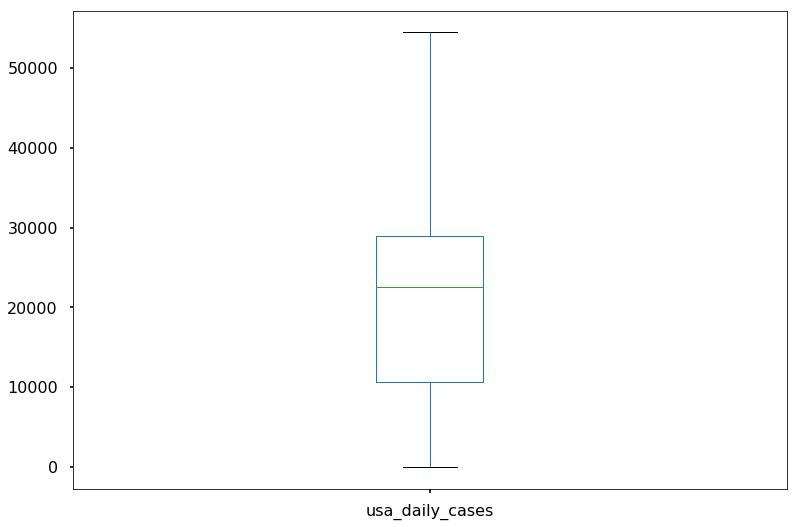

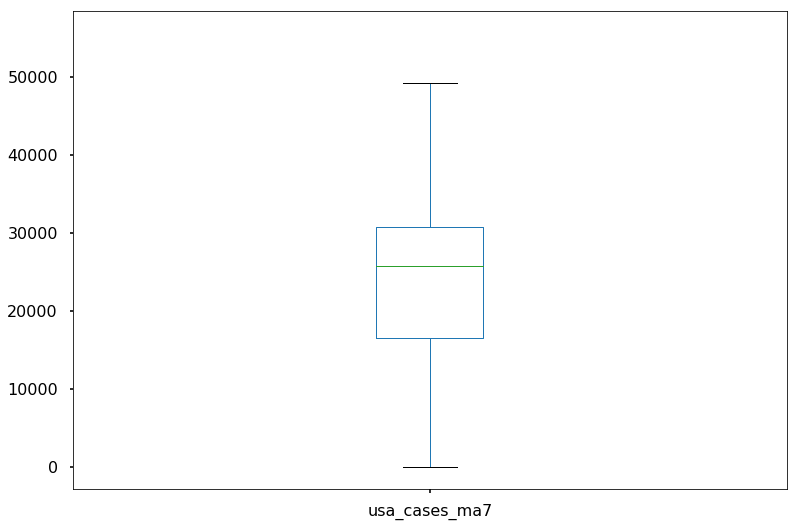

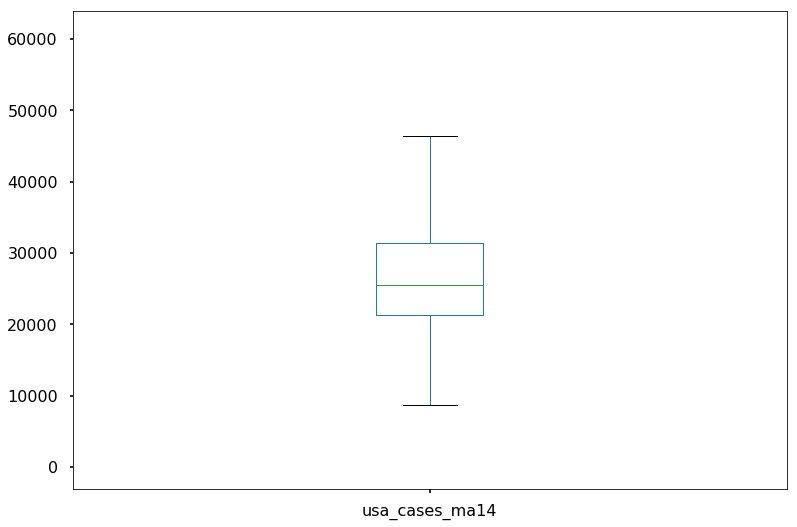

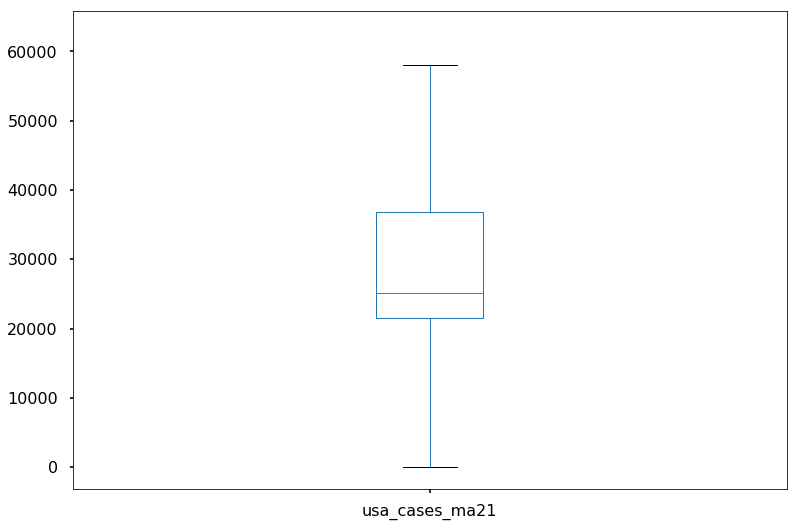

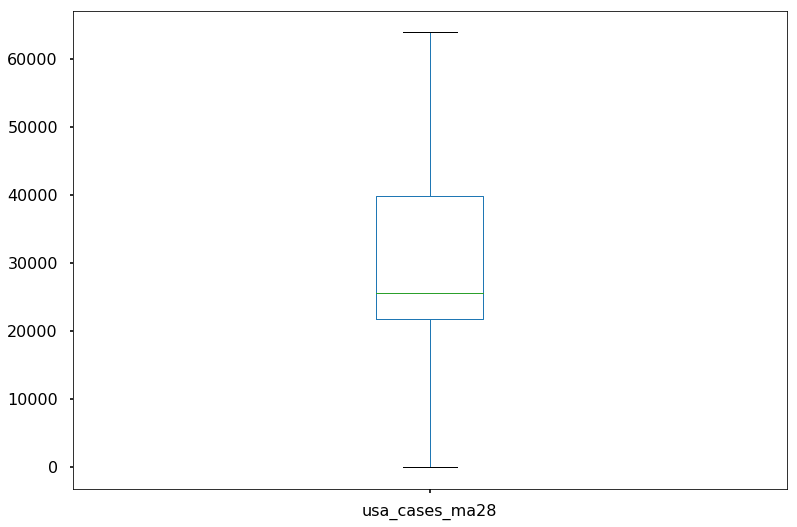

In [206]:
#----------------------------------------------------------------------------------
#------------Run a simple regression in Statsmodels with price as target and column as a predictor
#
#---------------------------------------------------------------------------------- 
# build initial trial formula based on assumptions of normalisation and best fit in explore phase

explore_outliers_boxplot('usa_daily_cases')
explore_outliers_boxplot('usa_cases_ma7')
explore_outliers_boxplot('usa_cases_ma14')
explore_outliers_boxplot('usa_cases_ma21')
explore_outliers_boxplot('usa_cases_ma28')


f = 'Close~usa_daily_cases+usa_cases_ma7+usa_cases_ma14+usa_cases_ma21+usa_cases_ma28'
# create a fitted model in one line
model = smf.ols(formula=f, data=ecdc_covid_usa_nasdaq).fit()
#Get Regression Diagnostics Summary
model.summary()

___
## Observations

### Simple Regression

Kurtosis is less than 3 (2.694) first iteration (needs to be <=3)
Skew is less than 3 (-0.221) (needs to be <=3, moving towards 0)
P value is low at 0
R Squared is above 40% (0.4), slightly below average

##### Question: What would be more towards an ideal regression result?
R-Squared > 0.6
Kurtosis < 3
Skew closer to 0

Consider stepwise selection and further removing outliers and tails to normalise the data.  Possibly removing outliers on price ?


##### Question: Which covid case number ma had the best p value?
usa_cases_ma7 had a p value of 0.002 against nasdaq close price
then usa_cases_ma_28 had the second lowest p value of 0.016.

___


# MODEL

___
### Run Stepwise Selection

In [207]:
# Perform stepwise selection
import statsmodels.api as sm

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

#### Stepwise selection - NDX Close VS Covid19 Ma

In [208]:
# ecdc_covid_usa_nasdaq.drop('Date', axis=1)
col_list_select_ndxclose_vs_covid = ['Close','usa_daily_cases','usa_cases_ma7','usa_cases_ma14','usa_cases_ma21','usa_cases_ma28' ]

ecdc_covid_usa_nasdaq_select_ndxclose_vs_covid = ecdc_covid_usa_nasdaq[col_list_select_ndxclose_vs_covid]


In [209]:
ecdc_covid_usa_nasdaq_select_ndxclose_vs_covid.head()

,Close,usa_daily_cases,usa_cases_ma7,usa_cases_ma14,usa_cases_ma21,usa_cases_ma28
0,9079.629883,0.0,4.857143,28.428571,138.857143,954.000000
1,8834.870117,18.0,7.714286,37.071429,178.047619,1256.107143
2,8873.759766,0.0,7.142857,50.071429,219.428571,1656.750000
3,8436.669922,6.0,10.285714,69.428571,303.523810,1970.642857
4,8461.830078,1.0,14.285714,89.500000,445.523810,2469.107143


In [210]:
def stepwise_selection_results():
    """ Call stepwise_selection() and print the results forward-backward feature selection 
    Arguments:
    Returns: none
    """
    X = ecdc_covid_usa_nasdaq_select_ndxclose_vs_covid
    X = ecdc_covid_usa_nasdaq_select_ndxclose_vs_covid.drop('Close', axis=1)
    y = pd.DataFrame(ecdc_covid_usa_nasdaq_select_ndxclose_vs_covid, columns=['Close'])

    result = stepwise_selection(X, y, verbose = True)
    print('resulting features:')
    print(result)
    
stepwise_selection_results()

Add  usa_cases_ma7                  with p-value 0.000334068
resulting features:
['usa_cases_ma7']


#### Stepwise selection - NDX Close VS NDX Ma

In [211]:
col_list_select_ndxclose_vs_ndx_ma = ['Close','ndx_ma7','ndx_ma14','ndx_ma21','ndx_ma28' ]

ecdc_covid_usa_nasdaq_select_ndxclose_vs_ndx_ma = ecdc_covid_usa_nasdaq[col_list_select_ndxclose_vs_ndx_ma]

In [212]:
def stepwise_selection_results():
    """ Call stepwise_selection() and print the results forward-backward feature selection 
    Arguments:
    Returns: none
    """
    X = ecdc_covid_usa_nasdaq_select_ndxclose_vs_ndx_ma
    X = ecdc_covid_usa_nasdaq_select_ndxclose_vs_ndx_ma.drop('Close', axis=1)
    y = pd.DataFrame(ecdc_covid_usa_nasdaq_select_ndxclose_vs_ndx_ma, columns=['Close'])

    result = stepwise_selection(X, y, verbose = True)
    print('resulting features:')
    print(result)
    
stepwise_selection_results()

Add  ndx_ma7                        with p-value 1.33008e-38
Add  ndx_ma14                       with p-value 1.33008e-38
Add  ndx_ma28                       with p-value 2.31867e-07
Add  ndx_ma21                       with p-value 2.31867e-07
resulting features:
['ndx_ma7', 'ndx_ma14', 'ndx_ma28', 'ndx_ma21']


#### Stepwise selection - NDX Ma VS Covid19Ma

In [213]:
col_list_select_ndxma_vs_covid_ma = ['Close','ndx_ma7','ndx_ma14','ndx_ma21','ndx_ma28','usa_daily_cases','usa_cases_ma7','usa_cases_ma14','usa_cases_ma21','usa_cases_ma28' ]

ecdc_covid_usa_nasdaq_select_ndx_ma_vs_covid_ma = ecdc_covid_usa_nasdaq[col_list_select_ndxma_vs_covid_ma]

In [214]:
def stepwise_selection_results():
    """ Call stepwise_selection() and print the results forward-backward feature selection 
    Arguments:
    Returns: none
    """
    X = ecdc_covid_usa_nasdaq_select_ndx_ma_vs_covid_ma
    X = ecdc_covid_usa_nasdaq_select_ndx_ma_vs_covid_ma.drop('Close', axis=1)
    y = pd.DataFrame(ecdc_covid_usa_nasdaq_select_ndx_ma_vs_covid_ma, columns=['Close'])

    result = stepwise_selection(X, y, verbose = True)
    print('resulting features:')
    print(result)
    
stepwise_selection_results()

Add  ndx_ma7                        with p-value 1.33008e-38
Add  ndx_ma14                       with p-value 1.33008e-38
Add  ndx_ma28                       with p-value 2.31867e-07
Add  ndx_ma21                       with p-value 2.31867e-07
Add  usa_cases_ma7                  with p-value 0.000670371
resulting features:
['ndx_ma7', 'ndx_ma14', 'ndx_ma28', 'ndx_ma21', 'usa_cases_ma7']


___
## Simple Regression in Statsmodels


In [215]:
# build the formula 
# use predictors recommended by stepwise selection  
cols_to_use =['ndx_ma7','ndx_ma14','ndx_ma21','ndx_ma28','usa_cases_ma7']

predictors = '+'.join(cols_to_use)
f = 'Close~' + predictors
model = smf.ols(formula=f, data=ecdc_covid_usa_nasdaq_select_ndx_ma_vs_covid_ma).fit()

In [216]:
#Get Regression Diagnostics Summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     380.6
Date:                Mon, 21 Dec 2020   Prob (F-statistic):           4.55e-44
Time:                        17:46:07   Log-Likelihood:                -515.31
No. Observations:                  76   AIC:                             1039.
Df Residuals:                      72   BIC:                             1048.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       647.3039    276.270      2.343      0.022      96.571    1198.037
ndx_ma7           0.9489      0.114      8.319      0.000       0.721       1.176
ndx_ma14          0.9489      0.114      8.319      0.000       0.721       1.176
ndx_ma21         -0.4933      0.117     -4.233      0.000      -0.726      -0.261
ndx_ma28         -0.4933      0.117     -4.233      0.000      -0.726      -0.261
usa_cases_ma7     0.0068      0.002      3.556      0.001       0.003       0.011
==============================================================================
Omnibus:                        5.439   Durbin-Watson:                   1.271
Prob(Omnibus):                  0.066   Jarque-Bera (JB):                4.621
Skew:                          -0.528   Prob(JB):                       0.0992
Kurtosis:                       3.585   Cond. No.                     6.50e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.84e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [217]:
model.params.round()

Intercept        647.0
ndx_ma7            1.0
ndx_ma14           1.0
ndx_ma21          -0.0
ndx_ma28          -0.0
usa_cases_ma7      0.0
dtype: float64

___
### Regression Diagnostic Analysis

Regression Analysis and Diagnostics for formula: Close~usa_cases_ma7
-------------------------------------------------------------------------------------


/Users/SusannaVSyassen/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/SusannaVSyassen/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


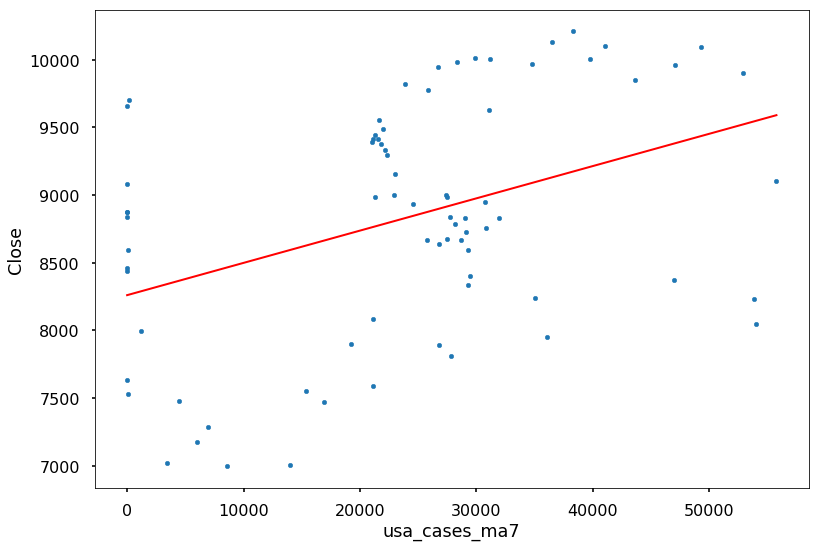

/Users/SusannaVSyassen/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


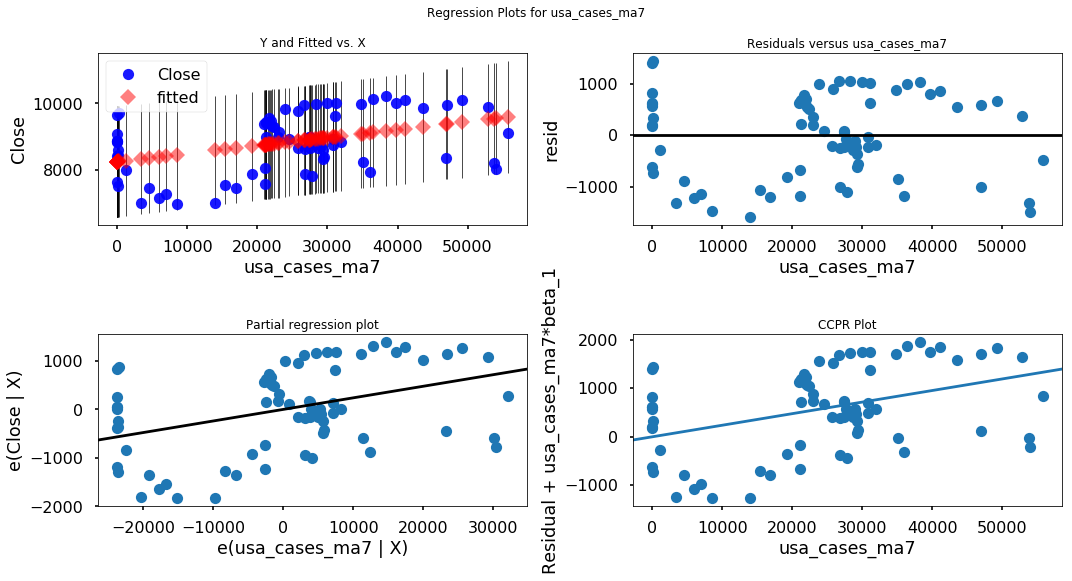

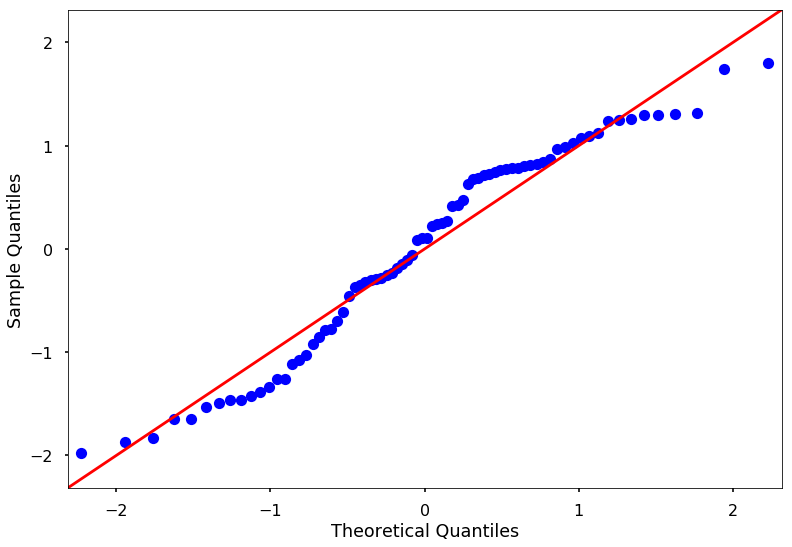

Press Enter to continue...


In [218]:
# import libraries
# import statsmodels.api as sm
# import statsmodels.formula.api as smf
# import scipy.stats as stats
# import statsmodels.stats.api as sms

# Run a simple OLS regression between independent and dependent variables
# Plot a regression line on the scatter plots
# Plot the residuals using sm.graphics.plot_regress_exog()
# Plot a Q-Q plot for regression residuals normality test
# Store following values in array for each iteration:
# Independent Variable
# r_squared'
# intercept'
# 'slope'
# 'p-value'
# 'normality (JB)'
# Comment on each output

results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value', 'normality (JB)' ]]
for idx, val in enumerate(['usa_cases_ma7']):
    print ("Regression Analysis and Diagnostics for formula: Close~" + val)
    print ("-------------------------------------------------------------------------------------")

    f = 'Close~' + val
   
    model = smf.ols(formula=f, data=ecdc_covid_usa_nasdaq).fit()
    
    X_new = pd.DataFrame({val: [ecdc_covid_usa_nasdaq[val].min(), ecdc_covid_usa_nasdaq[val].max()]});
    preds = model.predict(X_new)
    ecdc_covid_usa_nasdaq.plot(kind='scatter', x=val, y='Close');
    plt.plot(X_new, preds, c='red', linewidth=2);
    plt.show()
    fig = plt.figure(figsize=(15,8))
    fig = sm.graphics.plot_regress_exog(model, val, fig=fig)
    fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True,   )
    plt.show()
    
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1], sms.jarque_bera(model.resid)[0] ])
    input("Press Enter to continue...")

___
## Observations

### Regression Diagnostic Analysis

All the selected variables for the model show a positive relationship with the target price however there is room to reduce the variance by further normalising the variables and removing further outliers.

The above regression model was run on the target price variable which had outliers.

The decision made is to keep this example of data with the price target's outliers and present the analysis to the non technical audience as well as run the same model but with the outliers removed from the target price.  


---- Susan - should I do a run with removing outliers???


___
### Train Test Model

In [219]:
X = ecdc_covid_usa_nasdaq_select_ndx_ma_vs_covid_ma['usa_cases_ma7']
y = pd.DataFrame(ecdc_covid_usa_nasdaq_select_ndx_ma_vs_covid_ma.Close, columns = ['Close'])
type(X)

pandas.core.series.Series

In [220]:
from sklearn.model_selection import train_test_split

In [221]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [222]:
X_train = pd.DataFrame(X_train, columns=X.columns)
y_train = pd.DataFrame(y_train, columns=y.columns)

AttributeError: 'Series' object has no attribute 'columns'

In [223]:
X_train.head()

20    19198.142857
68    29898.714286
43    31942.142857
38    28182.857143
25       93.000000
Name: usa_cases_ma7, dtype: float64

In [224]:
y_train.head()

,Close
20,7897.129883
68,10012.000000
43,8834.110352
38,8786.599609
25,7528.109863


In [225]:
# A brief preview of train-test split
print(len(X_train), len(X_test), len(y_train), len(y_test))

60 16 60 16


In [226]:
df_train=pd.concat([X_train,y_train], axis=1)


In [227]:
# use predictors recommended by stepwise selection  
cols_to_use =['usa_cases_ma7']


predictors = '+'.join(cols_to_use)
f = 'Close~' +predictors


model = smf.ols(formula=f, data=df_train).fit()
#Get Regression Diagnostics Summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.213
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                     15.71
Date:                Mon, 21 Dec 2020   Prob (F-statistic):           0.000205
Time:                        17:46:39   Log-Likelihood:                -485.04
No. Observations:                  60   AIC:                             974.1
Df Residuals:                      58   BIC:                             978.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      8203.5805    186.846     43.906      0.000    7829.568    8577.593
usa_cases_ma7     0.0277      0.007      3.964      0.000       0.014       0.042
==============================================================================
Omnibus:                       14.422   Durbin-Watson:                   2.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                4.366
Skew:                          -0.315   Prob(JB):                        0.113
Kurtosis:                       1.839   Cond. No.                     4.84e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.84e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [228]:
#Setup the test model (20%) of the data
y_predict=model.predict(X_test)   #20% model
from sklearn.metrics import r2_score
r2=r2_score(y_test, y_predict)
print(r2)

-0.09028097597927331


In [229]:
#Setup the train model (80%) of the data
y_train_predict=model.predict(X_train)  
from sklearn.metrics import r2_score
r2=r2_score(y_train, y_train_predict)
print(r2)

0.21313747824339524


___
## Observations

### Train Test

Test model R2 value is 0.13785282374203767
Train model R2 value is 0.1629971133345961
Actual model R2 value is 0.163

The resulting train results were in line with the actual model value given for this run.
The resulting test results were slightly in line with the actual model value given for this run.


- The R-Squared value was not significant (0.163).  
- Even though the model consistently selected the Covid19 7 Day Case Ma as a predictor out of the
other ma predictors, I would not base an investment on the Nasdaq index the Covid19 7 day 
case number ma
- The Nasdaq 7 day ma and 14 day ma were consistently stronger predictors then the 21 and 28 day ma


# iNTERPRET


##### Predictors with P - Values below 0.05
The predictors with p-value less than the significance level of 0.05 were added to the model.
This sample data provides enough evidence to reject the null hypothesis for the entire population. 
This data favors the hypothesis that there is a non-zero correlation. 
Changes in the independent variable are associated with changes in the response at 
the population level. These variables are statistically significant and probably a worthwhile 
addition to the regression model.

##### Predictors with P - Values above 0.05
The resulting features from stepwise selection with a p-value that is greater than the significance level 
indicates that there is insufficient evidence in the sample to conclude that a non-zero correlation exists.
They were hence not added to the list of model predictors for the model.

##### R-squared:	0.163
R-squared is a statistical measure of how close the data are to the fitted regression line. It is also known as the coefficient of determination, or the coefficient of multiple determination for multiple regression. 100% indicates that the model explains all the variability of the response data around its mean.  This model currently represents a 16.3% fit towards the regression line.

##### Skew:	  -0.304	
Skew measures the lack of symmetry in data distribution. A symmetrical distribution will have a skewness of 0. There are two types of Skewness: Positive and Negative. Positive Skewness means when the tail on the right side of the distribution is longer or fatter. The mean and median will be greater than the mode.  In this case, the tail is negatively skewed to the left.  I recommend that the tails be further normalised for the predictor
values in order to reduce the skew of this model towards 0. As the data was
price and case number sensitive according to the event (stock market crash) no normalisation was attempted.

##### Kurtosis:  1.887
Like skewness, kurtosis is a statistical measure that is used to describe the distribution. Distributions with low kurtosis exhibit tail data that are generally less extreme than the tails of the normal distribution. As the data was
price and case number sensitive according to the event (stock market crash) no normalisation was attempted.

##### Intercept:  -34827830.0
The intercept (often labeled the constant) is the expected mean value of Y when all X=0. Start with a regression equation with one predictor, X. If X sometimes equals 0, the intercept is simply the expected mean value of Y at that value. If X never equals 0, then the intercept has no intrinsic meaning.  The intercept in this case was:

	coef	std err	t	P>|t|	[0.025	0.975]
Intercept	8251.7545	195.405	42.229	0.000	7860.610	8642.899


# CONCLUSIONS & RECOMMENDATIONS

To propose two model results, depending on the requirements of the non technical audience.  Model 1 having a larger set of outliers and hence is less representative of the population but offers analysis of more expensive house prices and model 2 which has less variance to the regression line.  Both models however have similar output values except for a more obvious decrease in kurtosis and skew on model 2.

Model 1:  Prices with larger outliers with a price range of 
min price:  78000.0
max price:  1640000.0
mean price:  493075.0

Model 2:  Prices with reduced outliers that are closer to having data with a more representative population, 
with a price range of 
min price:  78000.0
max price:  1210000.0
mean price:  476882.0

The values for model 1 may be presented as extra information on house prices up to US$1.64million.
I have chosen however to further present data below from model 2 on house prices up to US$1.21 million  which is more representative of the population.  Both model price data however have very close mean.

## Potential Points of Interest to Present Analysis to Non Technical Audience

### Future Work
This analysis may be adjusted to analyse data of a number of permutations of risk for Nasdaq ma:
- The results were based on the ma data of the Daily Nasdaq Close Price.  Analysis may be further detailed by extracting faster or slower mas from 2 minutes to monthly.  The extraction of faster data would be more insightful during the short term period of the initial stock market covid19 crash.

This analysis may be adjusted to analyse data of a number of permutations of risk for Covid19 ma:
- Including world wide case numbers or other news tangents including number of positive vaccine announcements or other news related to Covid19.


### What is the scope of the data analysed?

In [230]:
ecdc_covid_usa_nasdaq['Close'].describe()

count       76.000000
mean      8825.583663
std        880.446271
min       6994.290039
25%       8236.282715
50%       8855.709961
75%       9502.644531
max      10209.799805
Name: Close, dtype: float64

### Which covid case daily ma effects Close price the most?

In [231]:
ecdc_covid_usa_nasdaq_select_ndx_ma_vs_covid_ma["usa_cases_ma7"].describe()

count       76.000000
mean     23691.396617
std      14783.876283
min          0.142857
25%      16512.607143
50%      25767.214286
75%      30777.071429
max      55758.857143
Name: usa_cases_ma7, dtype: float64

### Which Nasdaq daily ma effected Close price the most during the Covid19 Crash?

In line with the Covid19 7 day ma representing the strongest predictor covid ma, so too did the Nasdaq 7 Day and 
14 Day ma predictors.  The analysis of this data thus points to a trend during this period of between 7 - 14 days
for market changes in the Nasdaq to be most significant.

In [232]:
ecdc_covid_usa_nasdaq_select_ndx_ma_vs_covid_ma["ndx_ma7"].describe()

count       76.000000
mean      8789.273121
std        846.721648
min       7216.151437
25%       8116.110805
50%       8840.869280
75%       9454.222447
max      10063.954241
Name: ndx_ma7, dtype: float64

In [233]:
ecdc_covid_usa_nasdaq_select_ndx_ma_vs_covid_ma["ndx_ma14"].describe()

count       76.000000
mean      8789.273121
std        846.721648
min       7216.151437
25%       8116.110805
50%       8840.869280
75%       9454.222447
max      10063.954241
Name: ndx_ma14, dtype: float64

In [236]:
ecdc_covid_usa_nasdaq_select_ndx_ma_vs_covid_ma.head()

,Close,ndx_ma7,ndx_ma14,ndx_ma21,ndx_ma28,usa_daily_cases,usa_cases_ma7,usa_cases_ma14,usa_cases_ma21,usa_cases_ma28
0,9079.629883,9531.708705,9531.708705,9354.355127,9354.355127,0.0,4.857143,28.428571,138.857143,954.000000
1,8834.870117,9423.018694,9423.018694,9468.789160,9468.789160,18.0,7.714286,37.071429,178.047619,1256.107143
2,8873.759766,9315.901507,9315.901507,9404.379102,9404.379102,0.0,7.142857,50.071429,219.428571,1656.750000
3,8436.669922,9145.454381,9145.454381,9286.726074,9286.726074,6.0,10.285714,69.428571,303.523810,1970.642857
4,8461.830078,8965.897182,8965.897182,9173.339062,9173.339062,1.0,14.285714,89.500000,445.523810,2469.107143


As noted above, the 7 and 14 day mean is equal.  This was calculated initilly by taking the rolling mean
for each value.  It would be of future further interest to further define which ma is more significant.

### What are some interesting other findings in the EDA / Other?